In [1]:
from utils import get_core_set
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.rcParams['font.family'] = "Arial" # 设置字体族为你指定的字体
DPI = 600

In [2]:
def get_df_dockq(model_list: list[str], result_dir: Path) -> pd.DataFrame:
    df_list = []
    for model_name in model_list:
        df_dockq = pd.read_csv(result_dir / f"dockq_{model_name}.csv")
        df_list.append(df_dockq)
    return pd.concat(df_list)

In [3]:
model_list = ["af3", "chai", "helix", "afm", "rfaa"]
results_dir = Path("../results")

df_dockq = get_df_dockq(model_list, results_dir)
df_dockq["model_name"] = df_dockq["job_id"].apply(lambda x: x.split("_")[2])
df_dockq["seed"] = df_dockq["job_id"].apply(lambda x: x.split("_")[4])
df_summary = pd.read_csv("../summary_jobs.csv")

# 过滤掉长度大于 30 的多肽
print(len(df_summary))
df_summary = df_summary[df_summary["peptide_chain_len"] <= 30]
print(len(df_summary))

fullset_df = df_summary.copy()
coreset_df = get_core_set(df_summary)

df_dockq_full = df_dockq[df_dockq["job_name"].isin(fullset_df["job_name"])]
df_dockq_core = df_dockq[df_dockq["job_name"].isin(coreset_df["job_name"])]

284
266
len(full_set): 266
Test Independant Set (N): 172
Test Redundent Set (N): 32
Train Redundent Set (N): 79



In [4]:
df_dockq_af3 = df_dockq_full[df_dockq_full["model_name"] == "af3"]

In [5]:
print(df_dockq_af3["job_name"].nunique())
print(df_dockq_af3["job_name"].unique())

266
['8c5l_C' '8ccz_C' '8cd3_A' '8cir_C' '8cis_B' '8ck5_B' '8ckc_B' '8cky_B'
 '8cm9_E' '8cmc_C' '8cmd_C' '8cme_C' '8cmg_C' '8cmi_C' '8cob_F' '8cqy_B'
 '8fu4_C' '8fua_C' '8fub_B' '8fuc_A' '8fuc_F' '8fud_C' '8fym_C' '8fyu_C'
 '8fzm_B' '8g8a_C' '8g8c_C' '8g8q_B' '8g8q_C' '8gai_B' '8gck_C' '8gjg_B'
 '8gji_B' '8i3f_C' '8i5e_P' '8ia4_Q' '8ia5_B' '8ia8_L' '8ib1_C' '8igc_B'
 '8in0_B' '8isn_C' '8ivz_C' '8iya_D' '8j5u_B' '8jbg_A' '8jbh_A' '8jgb_L'
 '8jgf_L' '8jgg_L' '8jis_P' '8jj9_C' '8jjv_B' '8jly_B' '8jv0_C' '8jyq_C'
 '8jzd_B' '8jzw_E' '8oep_B' '8ofg_C' '8og0_P' '8oio_F' '8okf_B' '8oni_B'
 '8op0_B' '8opi_B' '8os1_C' '8p0q_C' '8p43_P' '8p6i_A' '8p9o_P' '8p9r_C'
 '8p9w_B' '8p9x_B' '8pef_B' '8pii_B' '8pjg_C' '8pku_P' '8pkv_P' '8pn5_I'
 '8pwe_B' '8pwf_B' '8pwm_B' '8pxx_B' '8pz6_B' '8pz7_B' '8pz8_B' '8pz9_B'
 '8pzb_B' '8q1h_C' '8q1q_D' '8q1r_E' '8q26_E' '8q2z_C' '8q3s_C' '8q3t_C'
 '8q5p_B' '8q5s_B' '8q6d_B' '8q6e_B' '8q7i_P' '8q7k_C' '8qlg_C' '8qlk_B'
 '8qlm_C' '8qlv_B' '8qm0_E' '8qxw_B' '8r10_C' '

In [6]:
df_dockq_af3[df_dockq_af3["job_name"] == "8ck5_B"]

,job_id,job_name,peptide_chain,protein_chain,DockQ,F1,iRMSD,LRMSD,fnat,clashes,model_name,seed
175,8ck5_B_af3_seed_42_rank_0,8ck5_B,B,A,0.885491,0.888889,0.661940,1.007820,0.833333,0.0,af3,42
176,8ck5_B_af3_seed_42_rank_1,8ck5_B,B,A,0.885247,0.888889,0.663767,1.007016,0.833333,0.0,af3,42
177,8ck5_B_af3_seed_42_rank_2,8ck5_B,B,A,0.900780,0.913043,0.652349,0.998324,0.875000,0.0,af3,42
178,8ck5_B_af3_seed_42_rank_3,8ck5_B,B,A,0.873753,0.863636,0.648777,0.968470,0.791667,0.0,af3,42
179,8ck5_B_af3_seed_42_rank_4,8ck5_B,B,A,0.882710,0.851064,0.681282,1.019919,0.833333,0.0,af3,42
180,8ck5_B_af3_seed_2024_rank_0,8ck5_B,B,A,0.864047,0.844444,0.713851,1.044217,0.791667,0.0,af3,2024
181,8ck5_B_af3_seed_2024_rank_1,8ck5_B,B,A,0.901359,0.840000,0.647848,1.002288,0.875000,0.0,af3,2024
182,8ck5_B_af3_seed_2024_rank_2,8ck5_B,B,A,0.901062,0.893617,0.650413,0.996328,0.875000,0.0,af3,2024
183,8ck5_B_af3_seed_2024_rank_3,8ck5_B,B,A,0.901067,0.857143,0.649575,1.008446,0.875000,0.0,af3,2024
184,8ck5_B_af3_seed_2024_rank_4,8ck5_B,B,A,0.902626,0.875000,0.640001,0.979826,0.875000,0.0,af3,2024


In [7]:
x = df_dockq_af3.groupby("job_name").apply(lambda x: x.sort_values(by="DockQ", ascending=True))
x[x["job_name"] == "8c5l_C"]


/tmp/ipykernel_2349296/260820753.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  x = df_dockq_af3.groupby("job_name").apply(lambda x: x.sort_values(by="DockQ", ascending=True))


job_id job_name peptide_chain protein_chain  \
job_name                                                                        
8c5l_C   0     8c5l_C_af3_seed_42_rank_0   8c5l_C             C             A   
         5   8c5l_C_af3_seed_2024_rank_0   8c5l_C             C             A   
         23     8c5l_C_af3_seed_1_rank_3   8c5l_C             C             A   
         18   8c5l_C_af3_seed_100_rank_3   8c5l_C             C             A   
         6   8c5l_C_af3_seed_2024_rank_1   8c5l_C             C             A   
         13    8c5l_C_af3_seed_55_rank_3   8c5l_C             C             A   
         20     8c5l_C_af3_seed_1_rank_0   8c5l_C             C             A   
         2     8c5l_C_af3_seed_42_rank_2   8c5l_C             C             A   
         14    8c5l_C_af3_seed_55_rank_4   8c5l_C             C             A   
         19   8c5l_C_af3_seed_100_rank_4   8c5l_C             C             A   
         17   8c5l_C_af3_seed_100_rank_2   8c5l_C             C             A   
         3     8c5l_C_af3_seed_42_rank_3   8c5l_C             C             A   
         7   8c5l_C_af3_seed_2024_rank_2   8c5l_C             C             A   
         4     8c5l_C_af3_seed_42_rank_4   8c5l_C             C             A   
         22     8c5l_C_af3_seed_1_rank_2   8c5l_C             C             A   
         12    8c5l_C_af3_seed_55_rank_2   8c5l_C             C             A   
         15   8c5l_C_af3_seed_100_rank_0   8c5l_C             C             A   
         16   8c5l_C_af3_seed_100_rank_1   8c5l_C             C             A   
         9   8c5l_C_af3_seed_2024_rank_4   8c5l_C             C             A   
         24     8c5l_C_af3_seed_1_rank_4   8c5l_C             C             A   
         1     8c5l_C_af3_seed_42_rank_1   8c5l_C             C             A   
         10    8c5l_C_af3_seed_55_rank_0   8c5l_C             C             A   
         8   8c5l_C_af3_seed_2024_rank_3   8c5l_C             C             A   
         11    8c5l_C_af3_seed_55_rank_1   8c5l_C             C             A   
         21     8c5l_C_af3_seed_1_rank_1   8c5l_C             C             A   

                DockQ        F1      iRMSD      LRMSD  fnat  clashes  \
job_name                                                               
8c5l_C   0   0.022514  0.000000  15.303831  34.247372  0.00      0.0   
         5   0.031653  0.000000   7.792254  33.877096  0.00      0.0   
         23  0.034606  0.000000   8.463973  30.208226  0.00      0.0   
         18  0.039535  0.000000   7.729838  28.381160  0.00      0.0   
         6   0.041463  0.000000   8.945279  25.928627  0.00      0.0   
         13  0.050248  0.058824   7.877192  32.040300  0.05      0.0   
         20  0.088275  0.000000   7.941808  15.535761  0.00      0.0   
         2   0.090416  0.000000   7.572569  15.400774  0.00      0.0   
         14  0.091426  0.060606   8.230002  17.429864  0.05      0.0   
         19  0.092931  0.000000   7.568463  15.084631  0.00      0.0   
         17  0.095722  0.000000   8.028795  14.588701  0.00      0.0   
         3   0.097935  0.054054   7.666971  16.639870  0.05      0.0   
         7   0.100746  0.055556   7.789068  16.171071  0.05      0.0   
         4   0.100885  0.000000   7.441217  14.206800  0.00      0.0   
         22  0.102878  0.057143   8.553008  15.605561  0.05      0.0   
         12  0.107111  0.054054   7.775141  15.316985  0.05      0.0   
         15  0.109201  0.047619   7.792131  15.048780  0.05      0.0   
         16  0.116116  0.054054   7.419682  14.374201  0.05      0.0   
         9   0.116975  0.064516   7.289995  14.328498  0.05      0.0   
         24  0.225771  0.187500   3.985628  10.340306  0.15      0.0   
         1   0.227732  0.187500   3.764878  10.493144  0.15      0.0   
         10  0.276577  0.216216   3.763653   8.625689  0.20      0.0   
         8   0.292412  0.160000   3.647535   7.963029  0.20      0.0   
         11  0.333740  0.266667   3.049582   6

In [8]:
summary_df = pd.read_csv("../summary_jobs.csv")

def search_peplen(job_name: str):
    global summary_df
    try:
        return summary_df.loc[summary_df["job_name"] == job_name, "peptide_chain_len"].values[0]
    except IndexError:
        print(f"Error: job_name {job_name} not found in summary_df.")
        return None

df_dockq_core["pep_len"] = df_dockq_core["job_name"].apply(search_peplen)
df_dockq_full["pep_len"] = df_dockq_full["job_name"].apply(search_peplen)

/tmp/ipykernel_2349296/1949782706.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dockq_core["pep_len"] = df_dockq_core["job_name"].apply(search_peplen)
/tmp/ipykernel_2349296/1949782706.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dockq_full["pep_len"] = df_dockq_full["job_name"].apply(search_peplen)


In [10]:
rename_dict = {
    "af3": "AF3",
    "chai": "Chai-1",
    "helix": "HF3",
    "afm": "AFM",
    "rfaa": "RFAA"
}

In [11]:
def plot_dockq(df: pd.DataFrame, metric="DockQ", seed_mode=False):

    ascending = metric in ["DockQ", "F1", "fnat"]
    result_list = []

    for model_name, model_group in df.groupby("model_name"):
        for job_name, job_group in model_group.groupby("job_name"):
            result = {"model_name": rename_dict[model_name], "job_name": job_name}
            
            if seed_mode:
                # 按种子值处理数据并计算均值
                score_seed_list = [
                    seed_group[metric].sort_values(ascending=ascending).iloc[0]
                    for _, seed_group in job_group.groupby("seed")
                ]
                result[metric] = np.mean(score_seed_list)
            else:
                # 直接取第一条排序后的指标值
                result[metric] = job_group[metric].sort_values(ascending=ascending).iloc[0]
            
            result_list.append(result)
    
    # 将结果转为 DataFrame
    result_df = pd.DataFrame(result_list)
    
    # 计算每个模型的统计值：均值、最小值、最大值和中位数
    grouped = result_df.groupby("model_name")[metric]
    statistics = grouped.agg(["mean", "min", "max", "median"])

    for model in statistics.index:
        print(
            f"Model: {model}, "
            f"N: {len(result_df[result_df['model_name'] == model])}, "
            f"Mean {metric}: {statistics.loc[model, ('mean')]}, "
            f"Min {metric}: {statistics.loc[model, ('min')]}, "
            f"Max {metric}: {statistics.loc[model, ('max')]}, "
            f"Median {metric}: {statistics.loc[model, ('median')]}"
        )
    
    # 将均值加入 DataFrame 并按均值排序
    result_df["mean_value"] = result_df["model_name"].map(statistics["mean"])
    result_df = result_df.sort_values(by="mean_value", ascending=not ascending)
    
    # 绘制箱型图
    fig, ax = plt.subplots(figsize=(5, 5), dpi=DPI)
    sns.boxplot(
        data=result_df,
        x="model_name",
        y=metric,
        hue="model_name",
        palette="Set3",
        showmeans=True,
        ax=ax
    )

    # 设置图表标签
    ax.set_xlabel("PFNNs")
    ax.set_ylabel(f"{metric}")

    # 显示图形
    plt.tight_layout()
    plt.show()

Model: AF3, N: 266, Mean DockQ: 0.5306480203573054, Min DockQ: 0.0068244068407983, Max DockQ: 0.9615410627417076, Median DockQ: 0.6228871192609823
Model: AFM, N: 266, Mean DockQ: 0.422962992531336, Min DockQ: 0.0065218666160421, Max DockQ: 0.946827617709549, Median DockQ: 0.3403702336442035
Model: Chai-1, N: 266, Mean DockQ: 0.4564516450629264, Min DockQ: 0.0029222957553897, Max DockQ: 0.9561209262870146, Median DockQ: 0.49904972198455133
Model: HF3, N: 266, Mean DockQ: 0.5185643781288171, Min DockQ: 0.0049545386985102, Max DockQ: 0.9533943516548024, Median DockQ: 0.5867856173261943
Model: RFAA, N: 258, Mean DockQ: 0.14566030128765198, Min DockQ: 0.0031309114919034, Max DockQ: 0.8778075379070017, Median DockQ: 0.0581185098339953


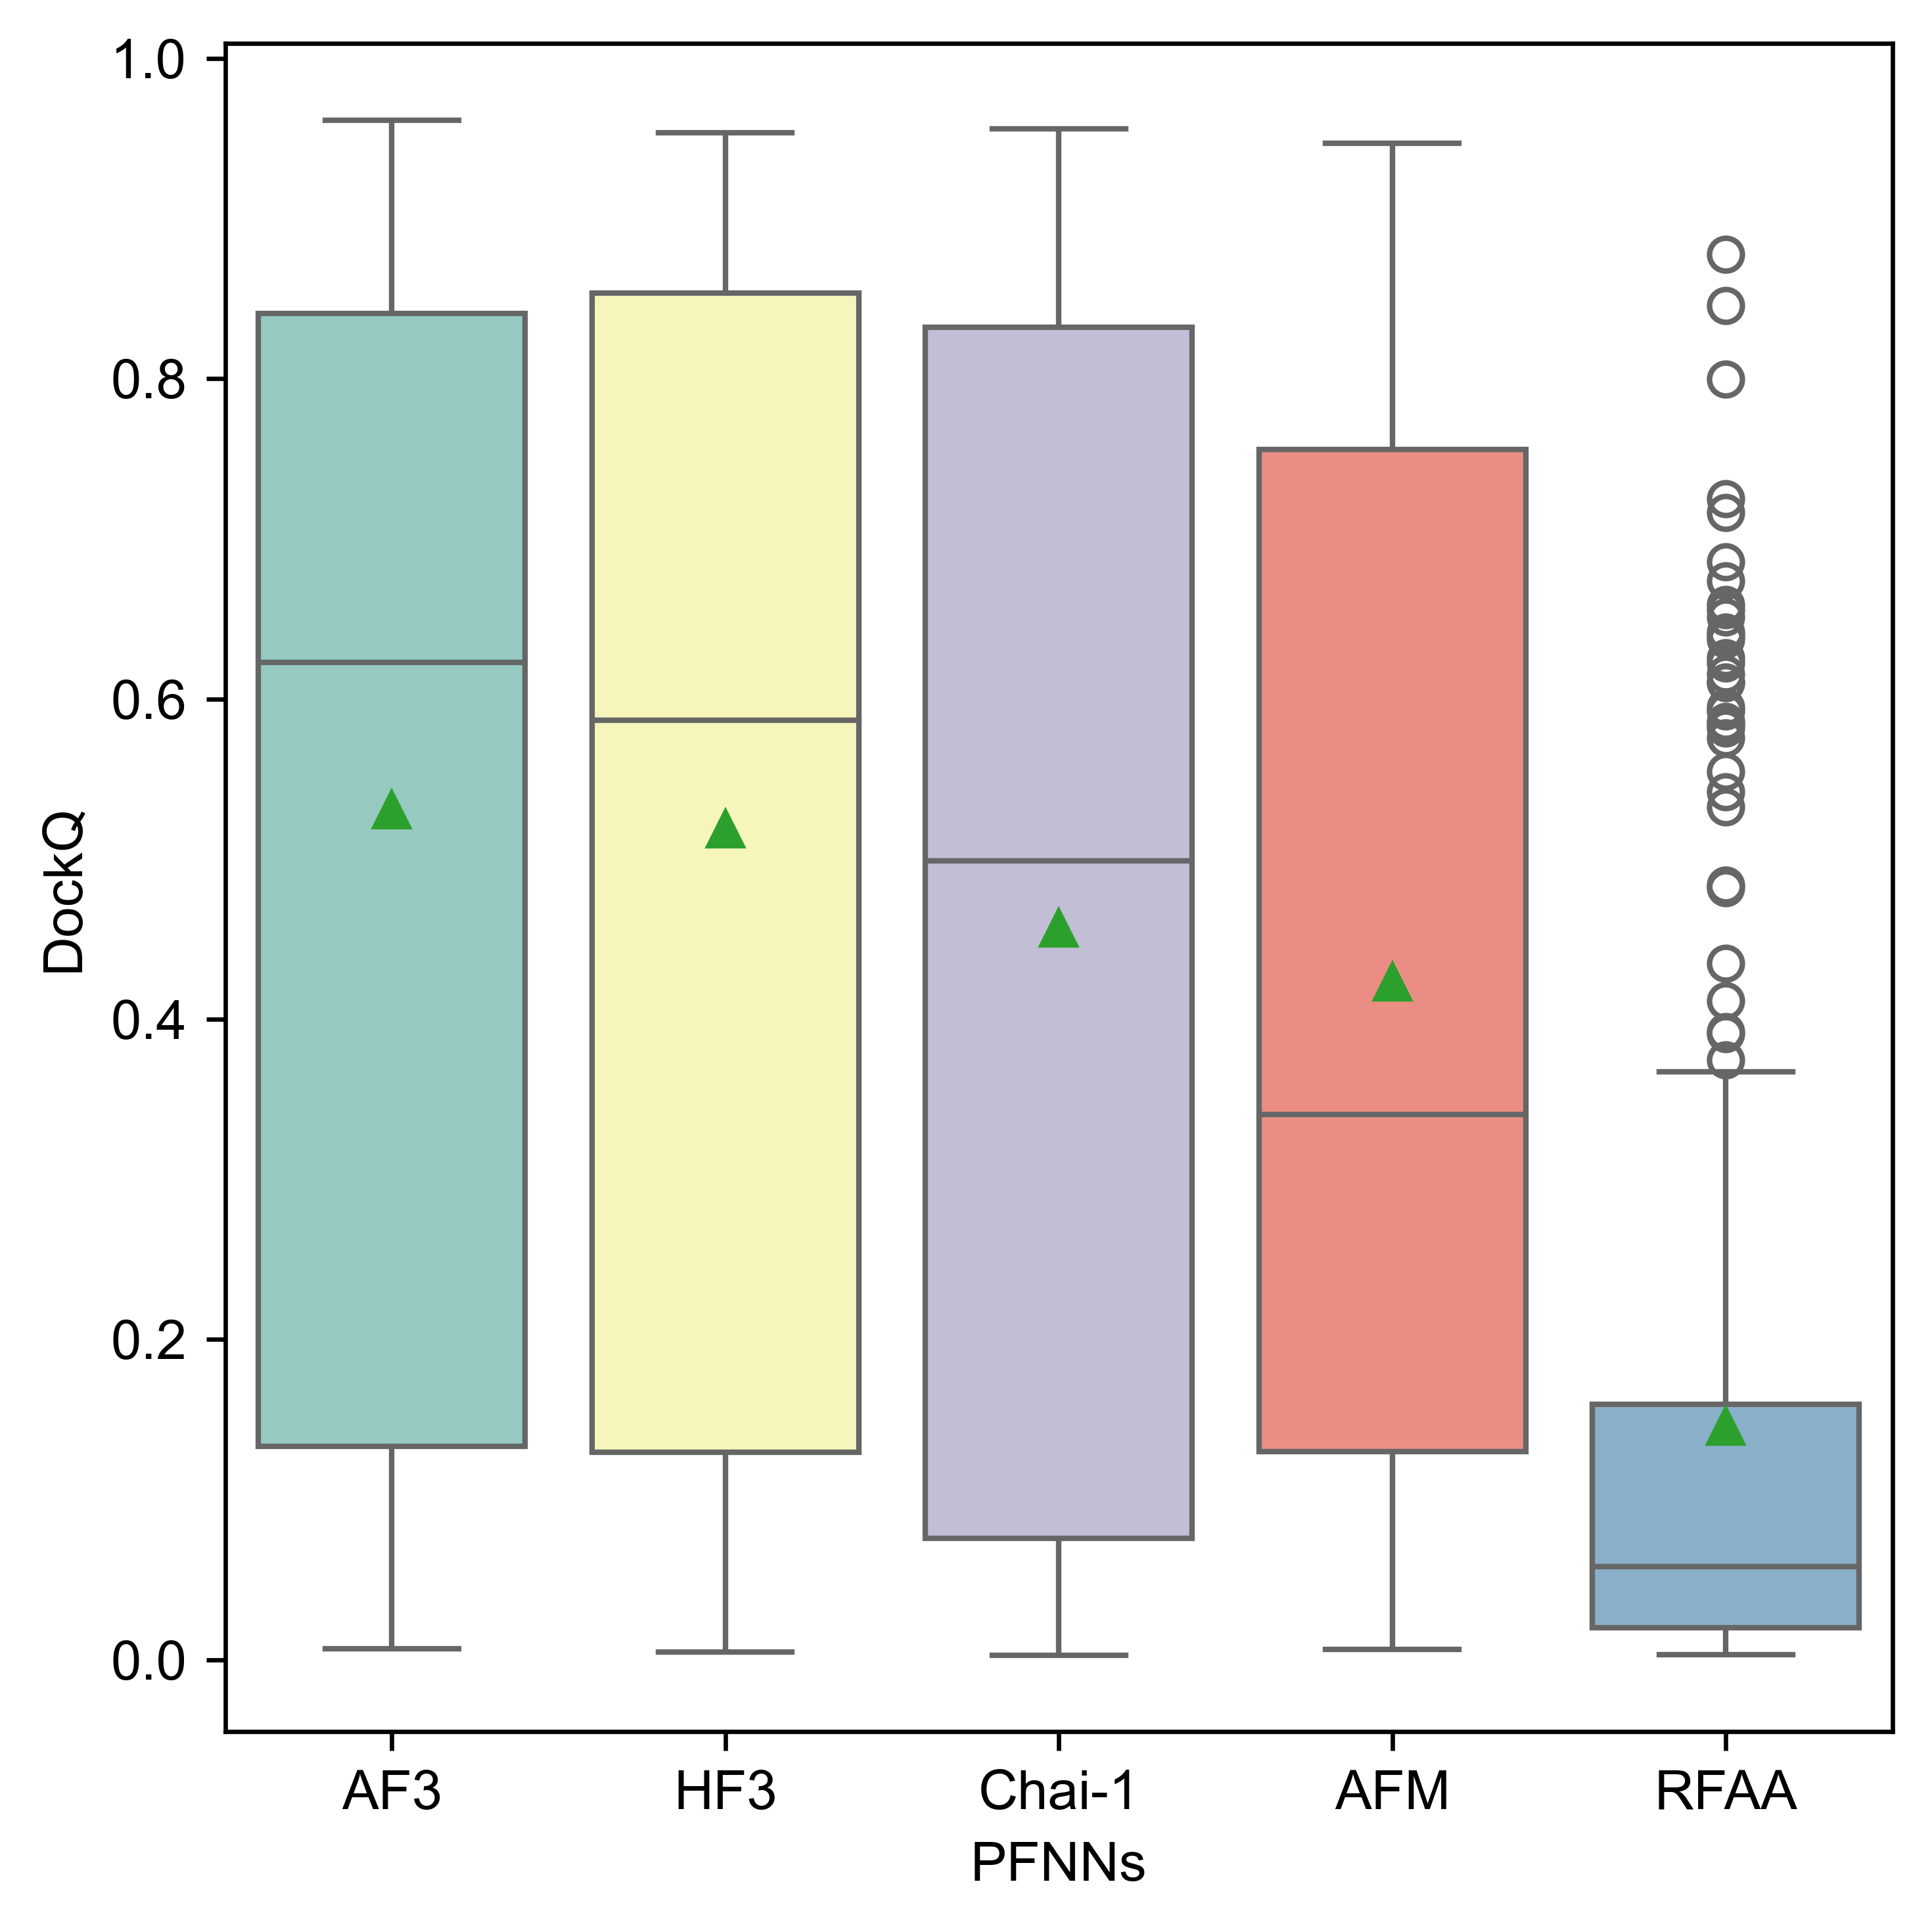

In [12]:
plot_dockq(df_dockq_full, "DockQ")

Model: AF3, N: 158, Mean DockQ: 0.45562986050011656, Min DockQ: 0.0068244068407983, Max DockQ: 0.9575864028214164, Median DockQ: 0.5041891702270734
Model: AFM, N: 158, Mean DockQ: 0.35749485652351254, Min DockQ: 0.0065218666160421, Max DockQ: 0.915515552354781, Median DockQ: 0.2490591211154695
Model: Chai-1, N: 158, Mean DockQ: 0.3805186937232088, Min DockQ: 0.0034960196000783, Max DockQ: 0.9561209262870146, Median DockQ: 0.2397523109539369
Model: HF3, N: 158, Mean DockQ: 0.44434186189761293, Min DockQ: 0.0049545386985102, Max DockQ: 0.9480218435408712, Median DockQ: 0.44168059697322665
Model: RFAA, N: 152, Mean DockQ: 0.12285779877076325, Min DockQ: 0.0031309114919034, Max DockQ: 0.8778075379070017, Median DockQ: 0.0526192889812425


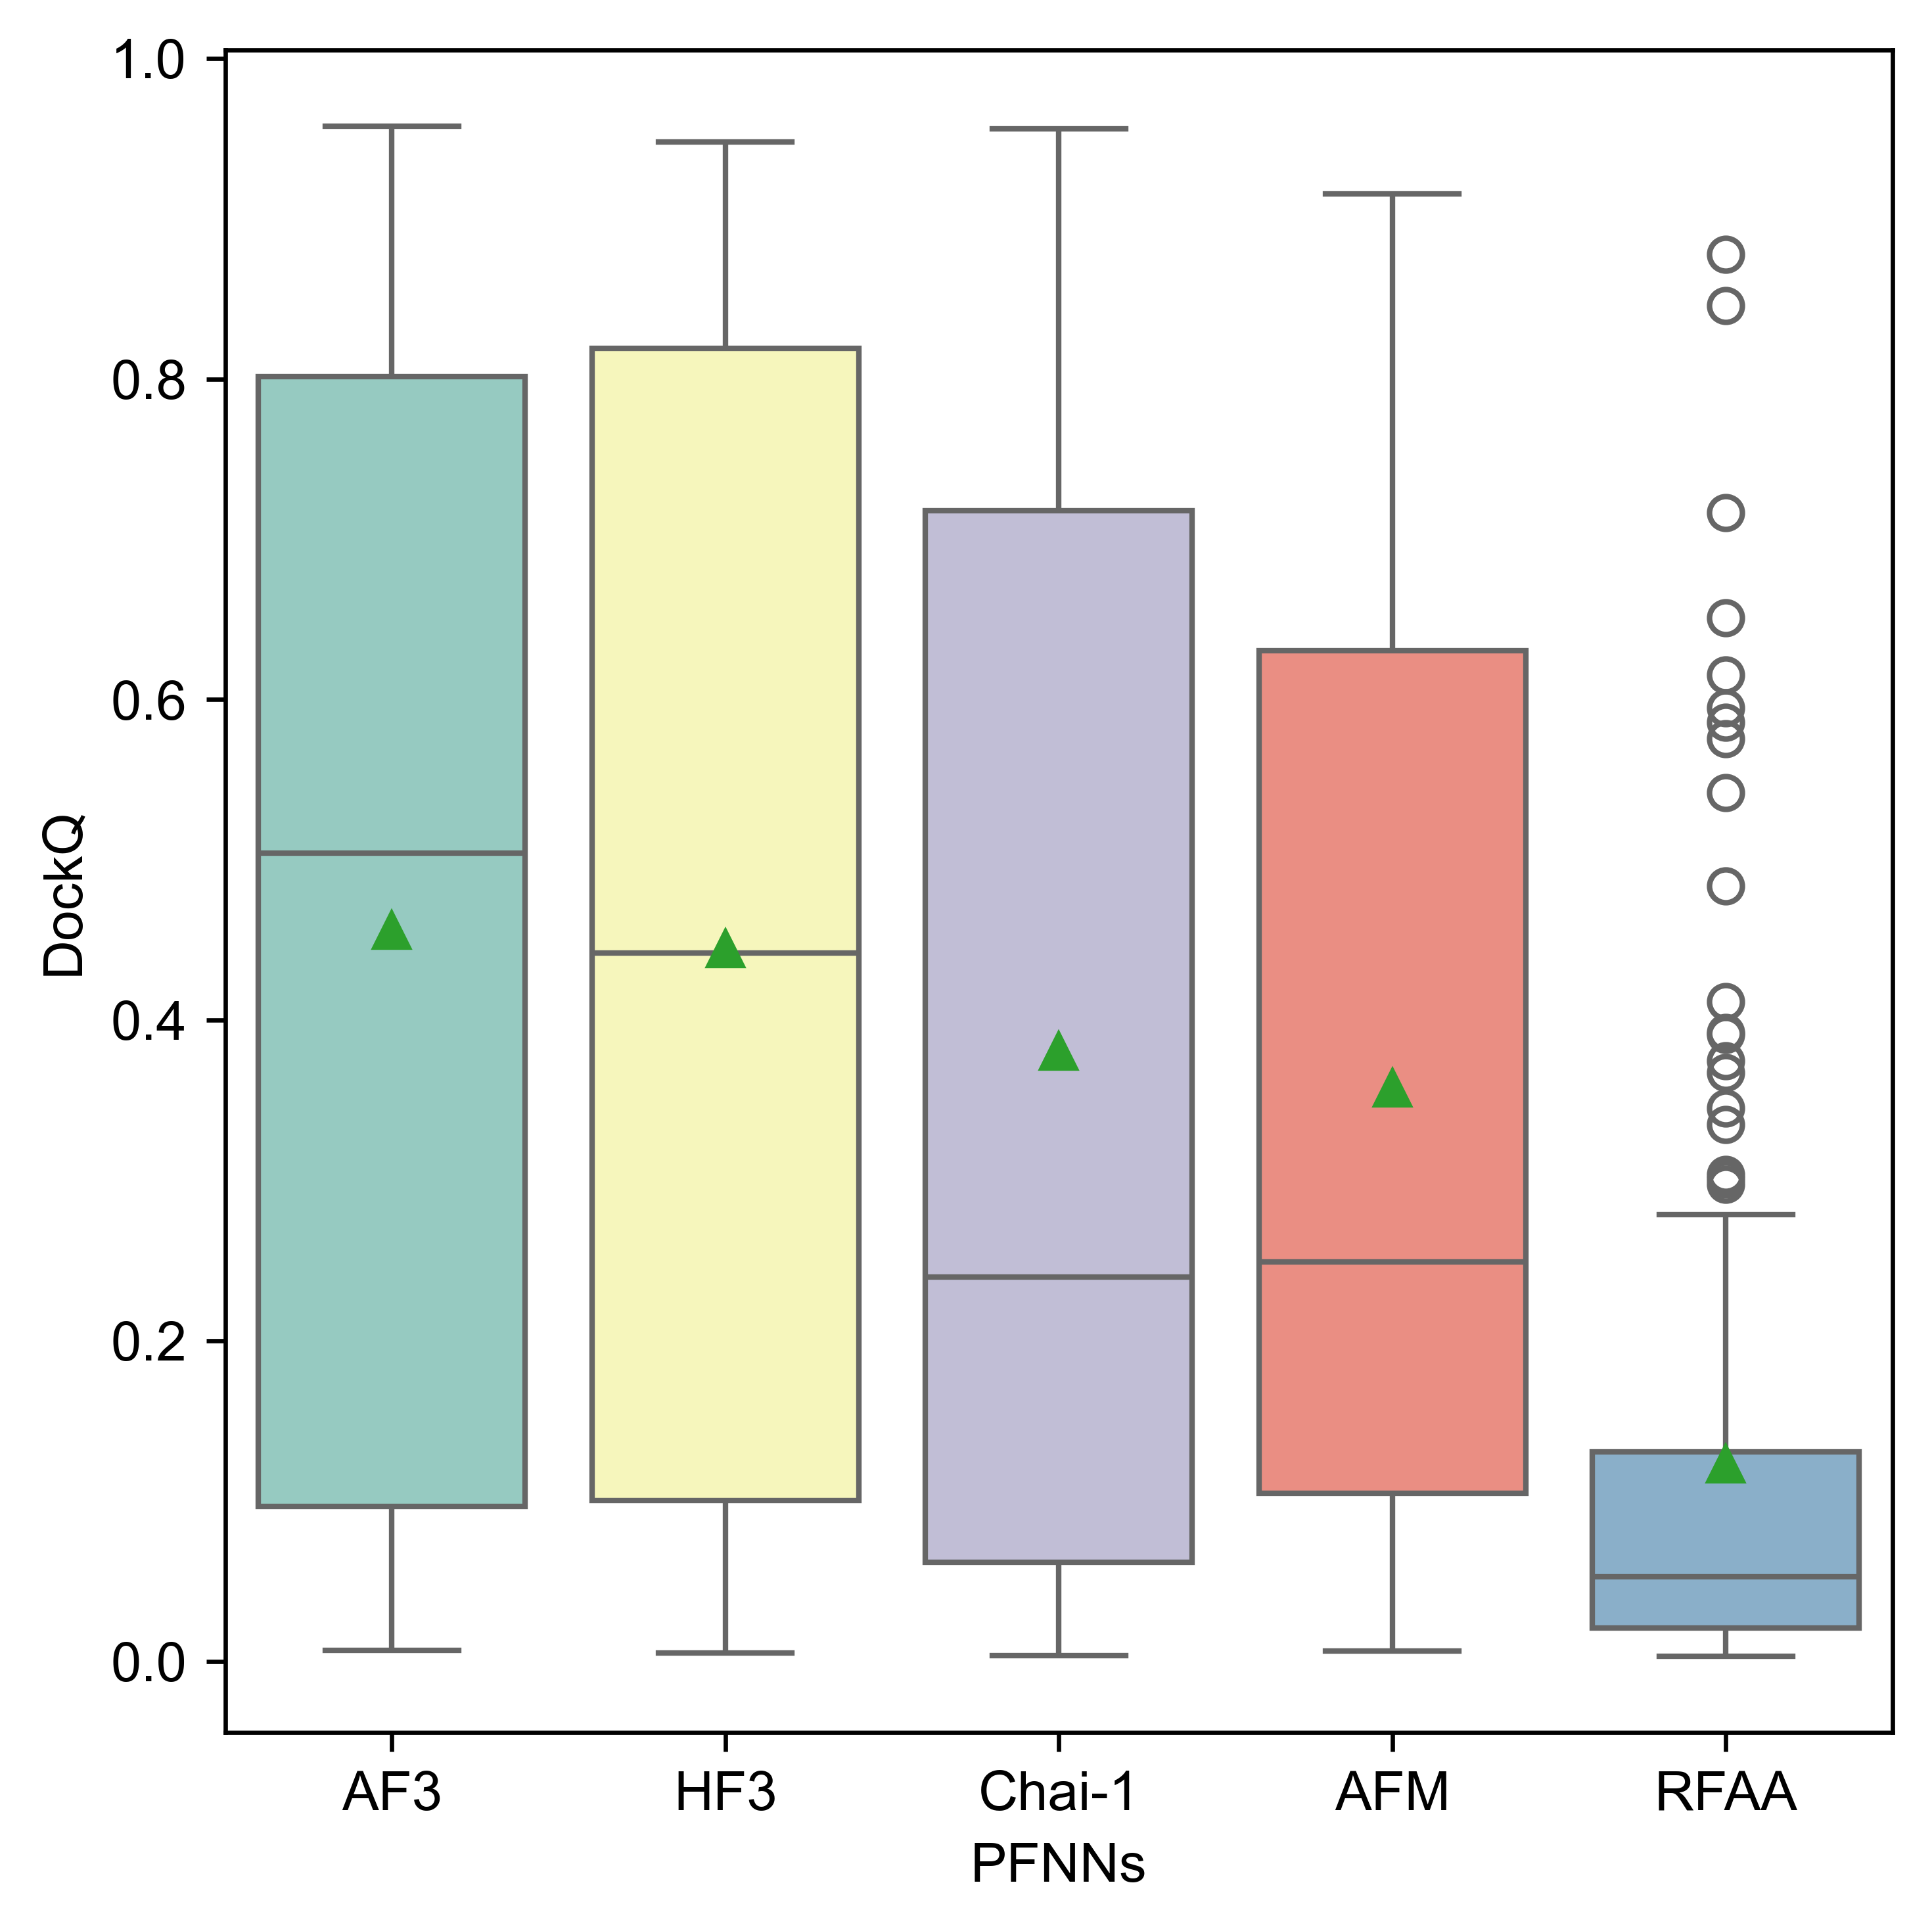

In [13]:
plot_dockq(df_dockq_core, "DockQ")

In [78]:
def plot_dockq_with_pep_len(df: pd.DataFrame, metric="DockQ", seed_mode=False, len_seg=["5-10", "10-15", "15-30"]):
    """
    绘制基于不同模型的 DockQ 分布图，并根据指定的长度区间划分数据。

    参数:
    - df: 包含模型名称、任务名称、种子值、长度信息和性能指标的数据框
    - metric: 用于绘图的性能指标，默认为 "DockQ"
    - seed_mode: 是否按种子值计算平均值，如果为True，则基于每个种子的指标计算均值
    - len_seg: 长度区间，用于分组，默认为["5-10", "10-15", "15-30"]
    """
    
    # 根据 metric 确定排序方式
    ascending = metric in ["DockQ", "F1", "fnat"]
    
    # 将长度区间划分为数字范围
    len_ranges = []
    for seg in len_seg:
        start, end = map(int, seg.split('-'))
        len_ranges.append((start, end))

    # 存储每个模型的结果
    result_list = []

    # 分组并计算指标
    for model_name, model_group in df.groupby("model_name"):
        for job_name, job_group in model_group.groupby("job_name"):
            # 按长度区间分组
            for start, end in len_ranges:
                # 筛选出长度在当前区间内的样本
                length_group = job_group[(job_group["pep_len"] >= start) & (job_group["pep_len"] < end)]
                
                # 如果有数据才进行处理
                if not length_group.empty:
                    result = {"model_name": model_name, "job_name": job_name, "length_range": f"{start}-{end}"}
                    
                    if seed_mode:
                        # 按种子值处理数据并计算均值
                        score_seed_list = [
                            seed_group[metric].sort_values(ascending=ascending).iloc[0]
                            for _, seed_group in length_group.groupby("seed")
                        ]
                        result[metric] = np.mean(score_seed_list)
                    else:
                        # 直接取第一条排序后的指标值
                        result[metric] = length_group[metric].sort_values(ascending=ascending).iloc[0]
                    
                    result_list.append(result)
    
    # 将结果转为 DataFrame
    result_df = pd.DataFrame(result_list)
    
    # 确保长度区间按照顺序排列
    result_df["length_range"] = pd.Categorical(result_df["length_range"], categories=len_seg, ordered=True)
    
    # 计算每个模型的统计值：均值、最小值、最大值和中位数
    grouped = result_df.groupby("model_name")[metric]
    statistics = grouped.agg(["mean", "min", "max", "median"])
    
    for model in statistics.index:
        print(
            f"Model: {model}, "
            f"Mean {metric}: {statistics.loc[model, ('mean')]}, "
            f"Min {metric}: {statistics.loc[model, ('min')]}, "
            f"Max {metric}: {statistics.loc[model, ('max')]}, "
            f"Median {metric}: {statistics.loc[model, ('median')]}"
        )
    
    # 将均值加入 DataFrame 并按均值排序
    result_df["mean_value"] = result_df["model_name"].map(statistics["mean"])
    result_df = result_df.sort_values(by="mean_value", ascending=not ascending)
    
    # 绘制箱型图
    fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
    sns.boxplot(
        data=result_df,
        x="model_name",
        y=metric,
        hue="length_range",
        palette="Set3",
        showmeans=True,
        ax=ax,
    boxprops=dict(alpha=1),  # Apply transparency to the boxes
    whiskerprops=dict(alpha= 1   ),  # Apply transparency to the whiskers
        capprops=dict(alpha=1),  # Apply transparency to the caps
    )

    # 设置图表标签
    ax.set_xlabel("Model")
    ax.set_ylabel(f"{metric}")
    ax.set_title(f"DockQ distribution by Length Segments")
    
    # 旋转x轴标签
    plt.xticks(rotation=45)
    plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1), borderaxespad=0)
    # 显示图形
    plt.tight_layout()
    plt.show()

Model: af3, Mean DockQ: 0.5345092250683094, Min DockQ: 0.0068244068407983, Max DockQ: 0.9615410627417076, Median DockQ: 0.6363049110852941
Model: afm, Mean DockQ: 0.42555996695955794, Min DockQ: 0.0065218666160421, Max DockQ: 0.946827617709549, Median DockQ: 0.34863526590038163
Model: chai, Mean DockQ: 0.4599558733727545, Min DockQ: 0.0029222957553897, Max DockQ: 0.9561209262870146, Median DockQ: 0.5087257711176678
Model: helix, Mean DockQ: 0.52243437459962, Min DockQ: 0.0049545386985102, Max DockQ: 0.9533943516548024, Median DockQ: 0.5995810640347184
Model: rfaa, Mean DockQ: 0.14658103994725358, Min DockQ: 0.0031309114919034, Max DockQ: 0.8778075379070017, Median DockQ: 0.0612606385206784


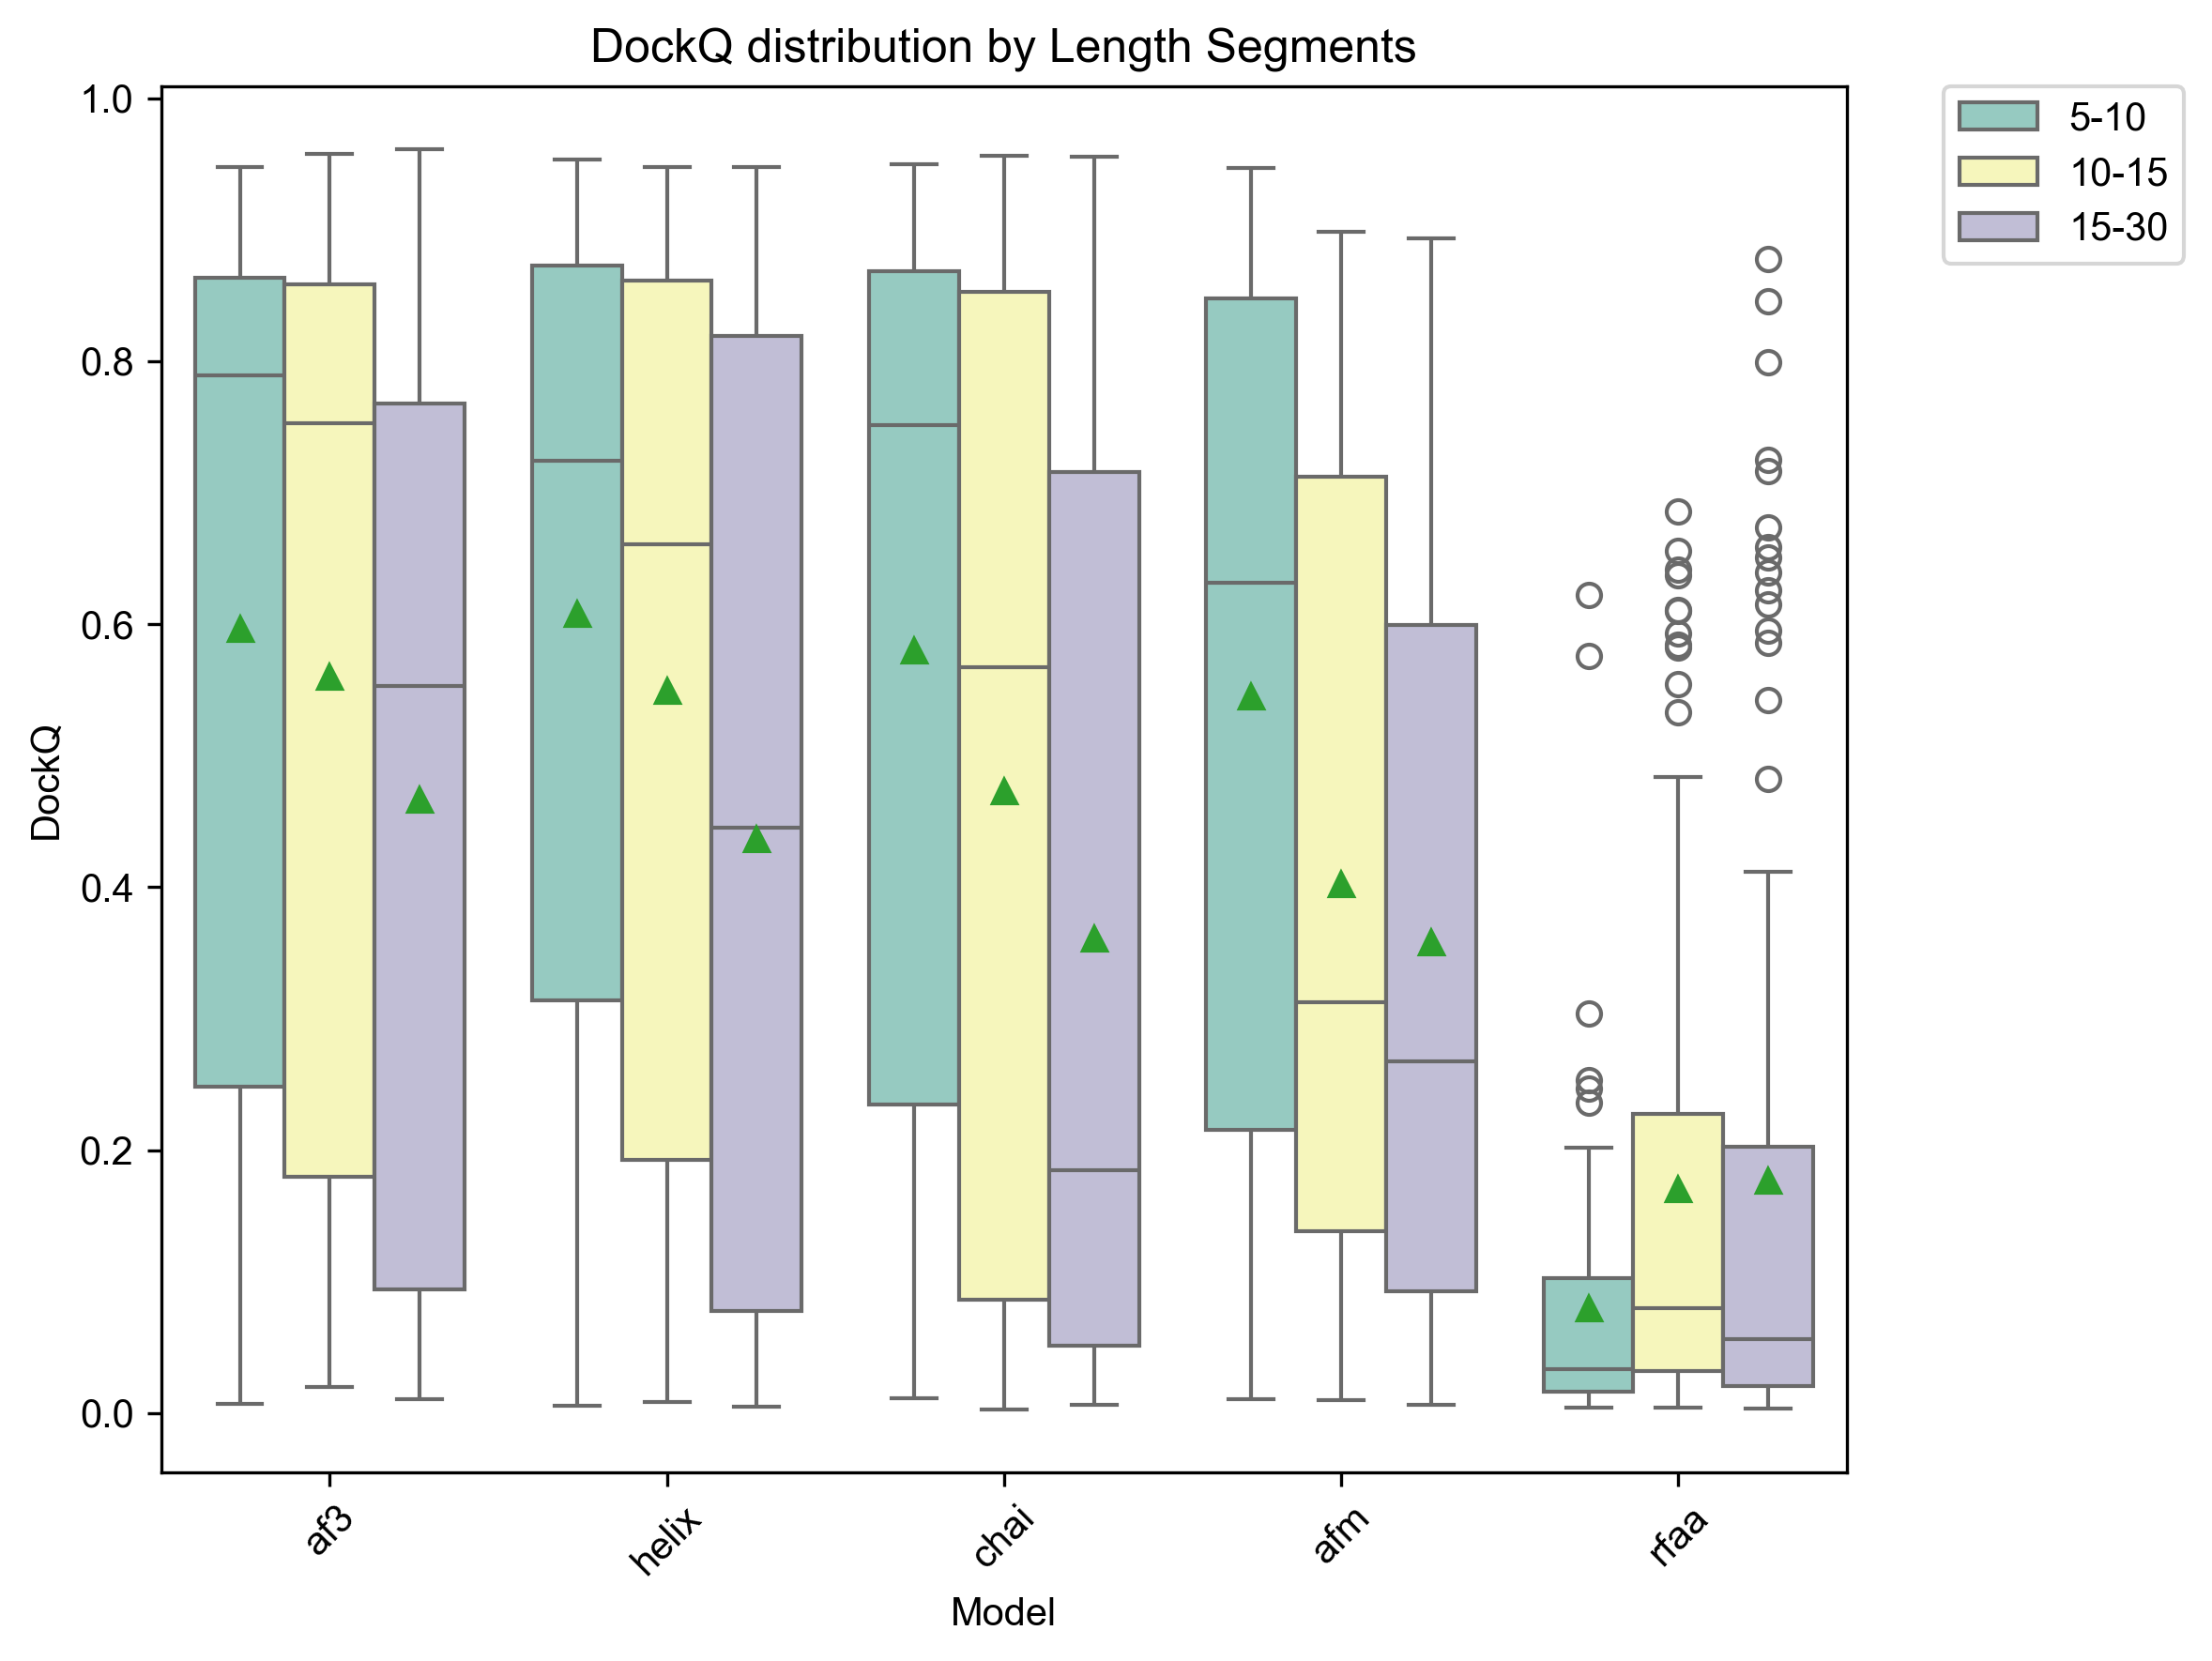

In [79]:
plot_dockq_with_pep_len(df_dockq_full, "DockQ")

Model: af3, Mean F1: 0.49858624069565993, Min F1: 0.0, Max F1: 0.9577464788732394, Median F1: 0.6832662642521797
Model: afm, Mean F1: 0.3634968820378709, Min F1: 0.0, Max F1: 0.9047619047619048, Median F1: 0.23666666666666664
Model: chai, Mean F1: 0.4166916679533233, Min F1: 0.0, Max F1: 0.92, Median F1: 0.5323412698412698
Model: helix, Mean F1: 0.4848359113676687, Min F1: 0.0, Max F1: 0.9285714285714286, Median F1: 0.6844093406593407
Model: rfaa, Mean F1: 0.10257018237728562, Min F1: 0.0, Max F1: 0.8275862068965517, Median F1: 0.0


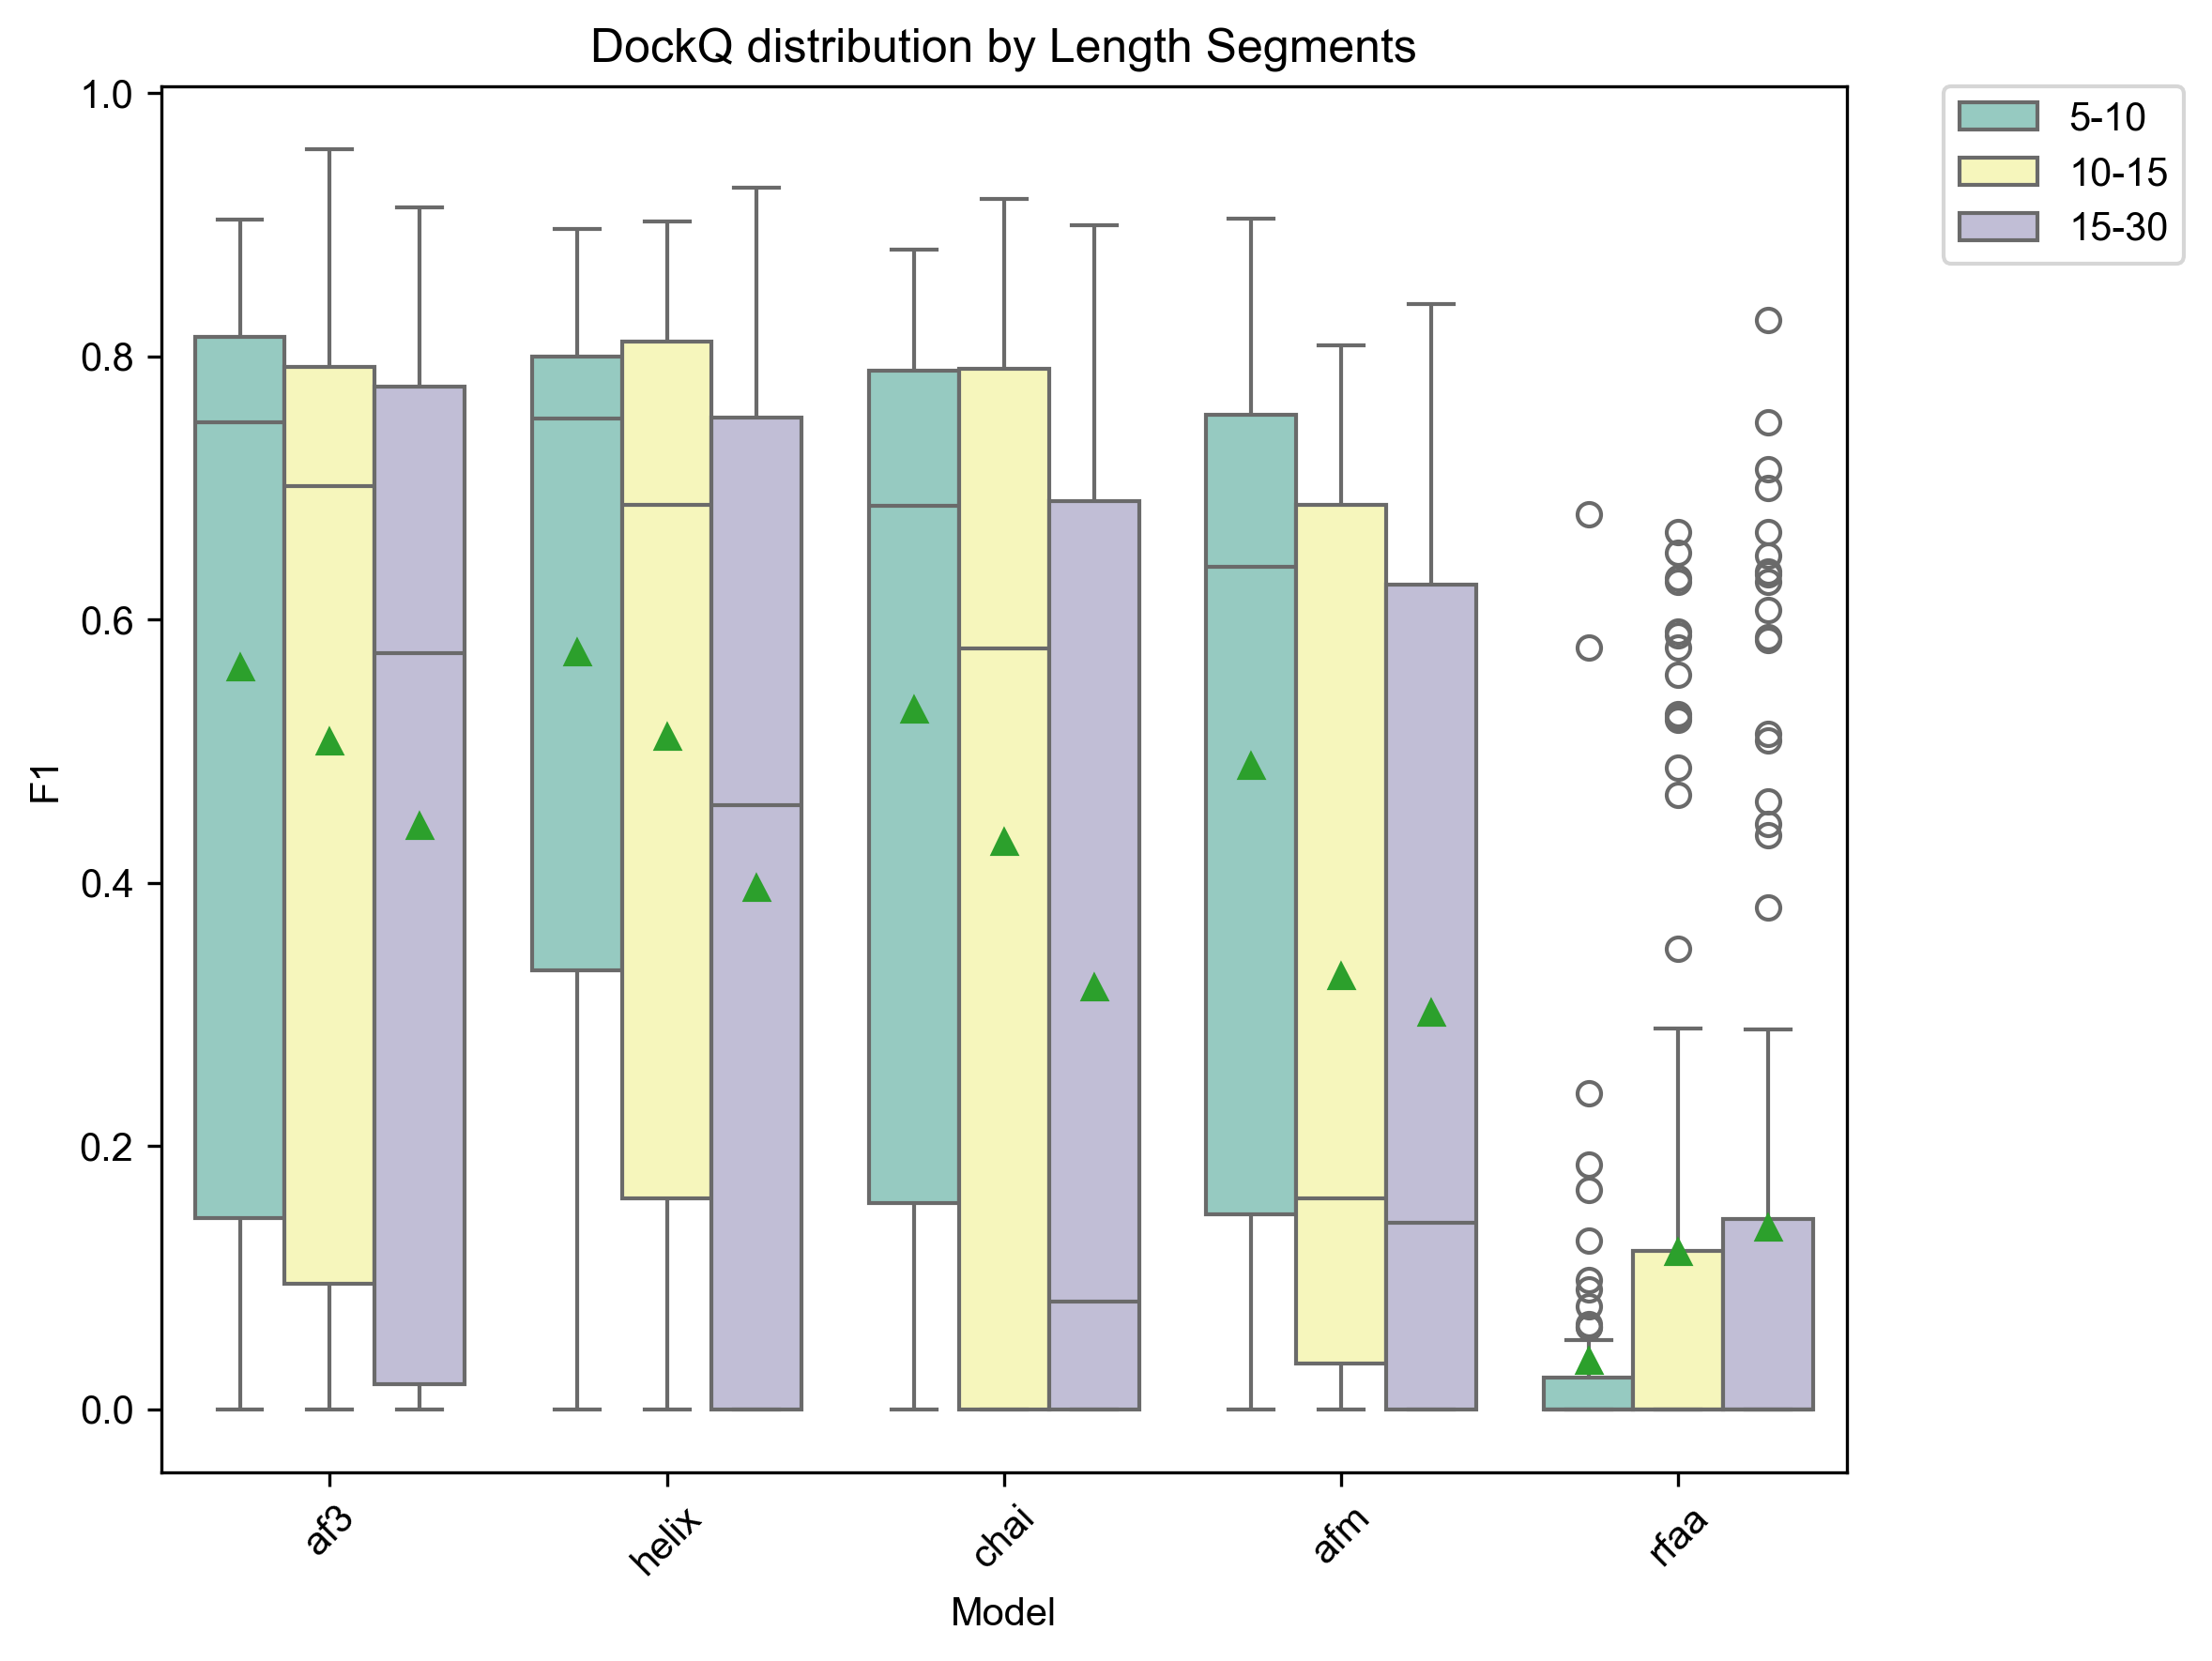

In [32]:
plot_dockq_with_pep_len(df_dockq_full, "F1")

Model: AF3, Mean F1: 0.48074495103410486, Min F1: 0.0, Max F1: 0.9577464788732394, Median F1: 0.6564402810304449
Model: AFM, Mean F1: 0.3544079659906725, Min F1: 0.0, Max F1: 0.9047619047619048, Median F1: 0.2247474747474747
Model: CHAI, Mean F1: 0.4017206541944875, Min F1: 0.0, Max F1: 0.92, Median F1: 0.45558176100628933
Model: HELIX, Mean F1: 0.46564201617705714, Min F1: 0.0, Max F1: 0.9285714285714286, Median F1: 0.6537892487259576
Model: RFAA, Mean F1: 0.10206782444323029, Min F1: 0.0, Max F1: 0.8275862068965517, Median F1: 0.0


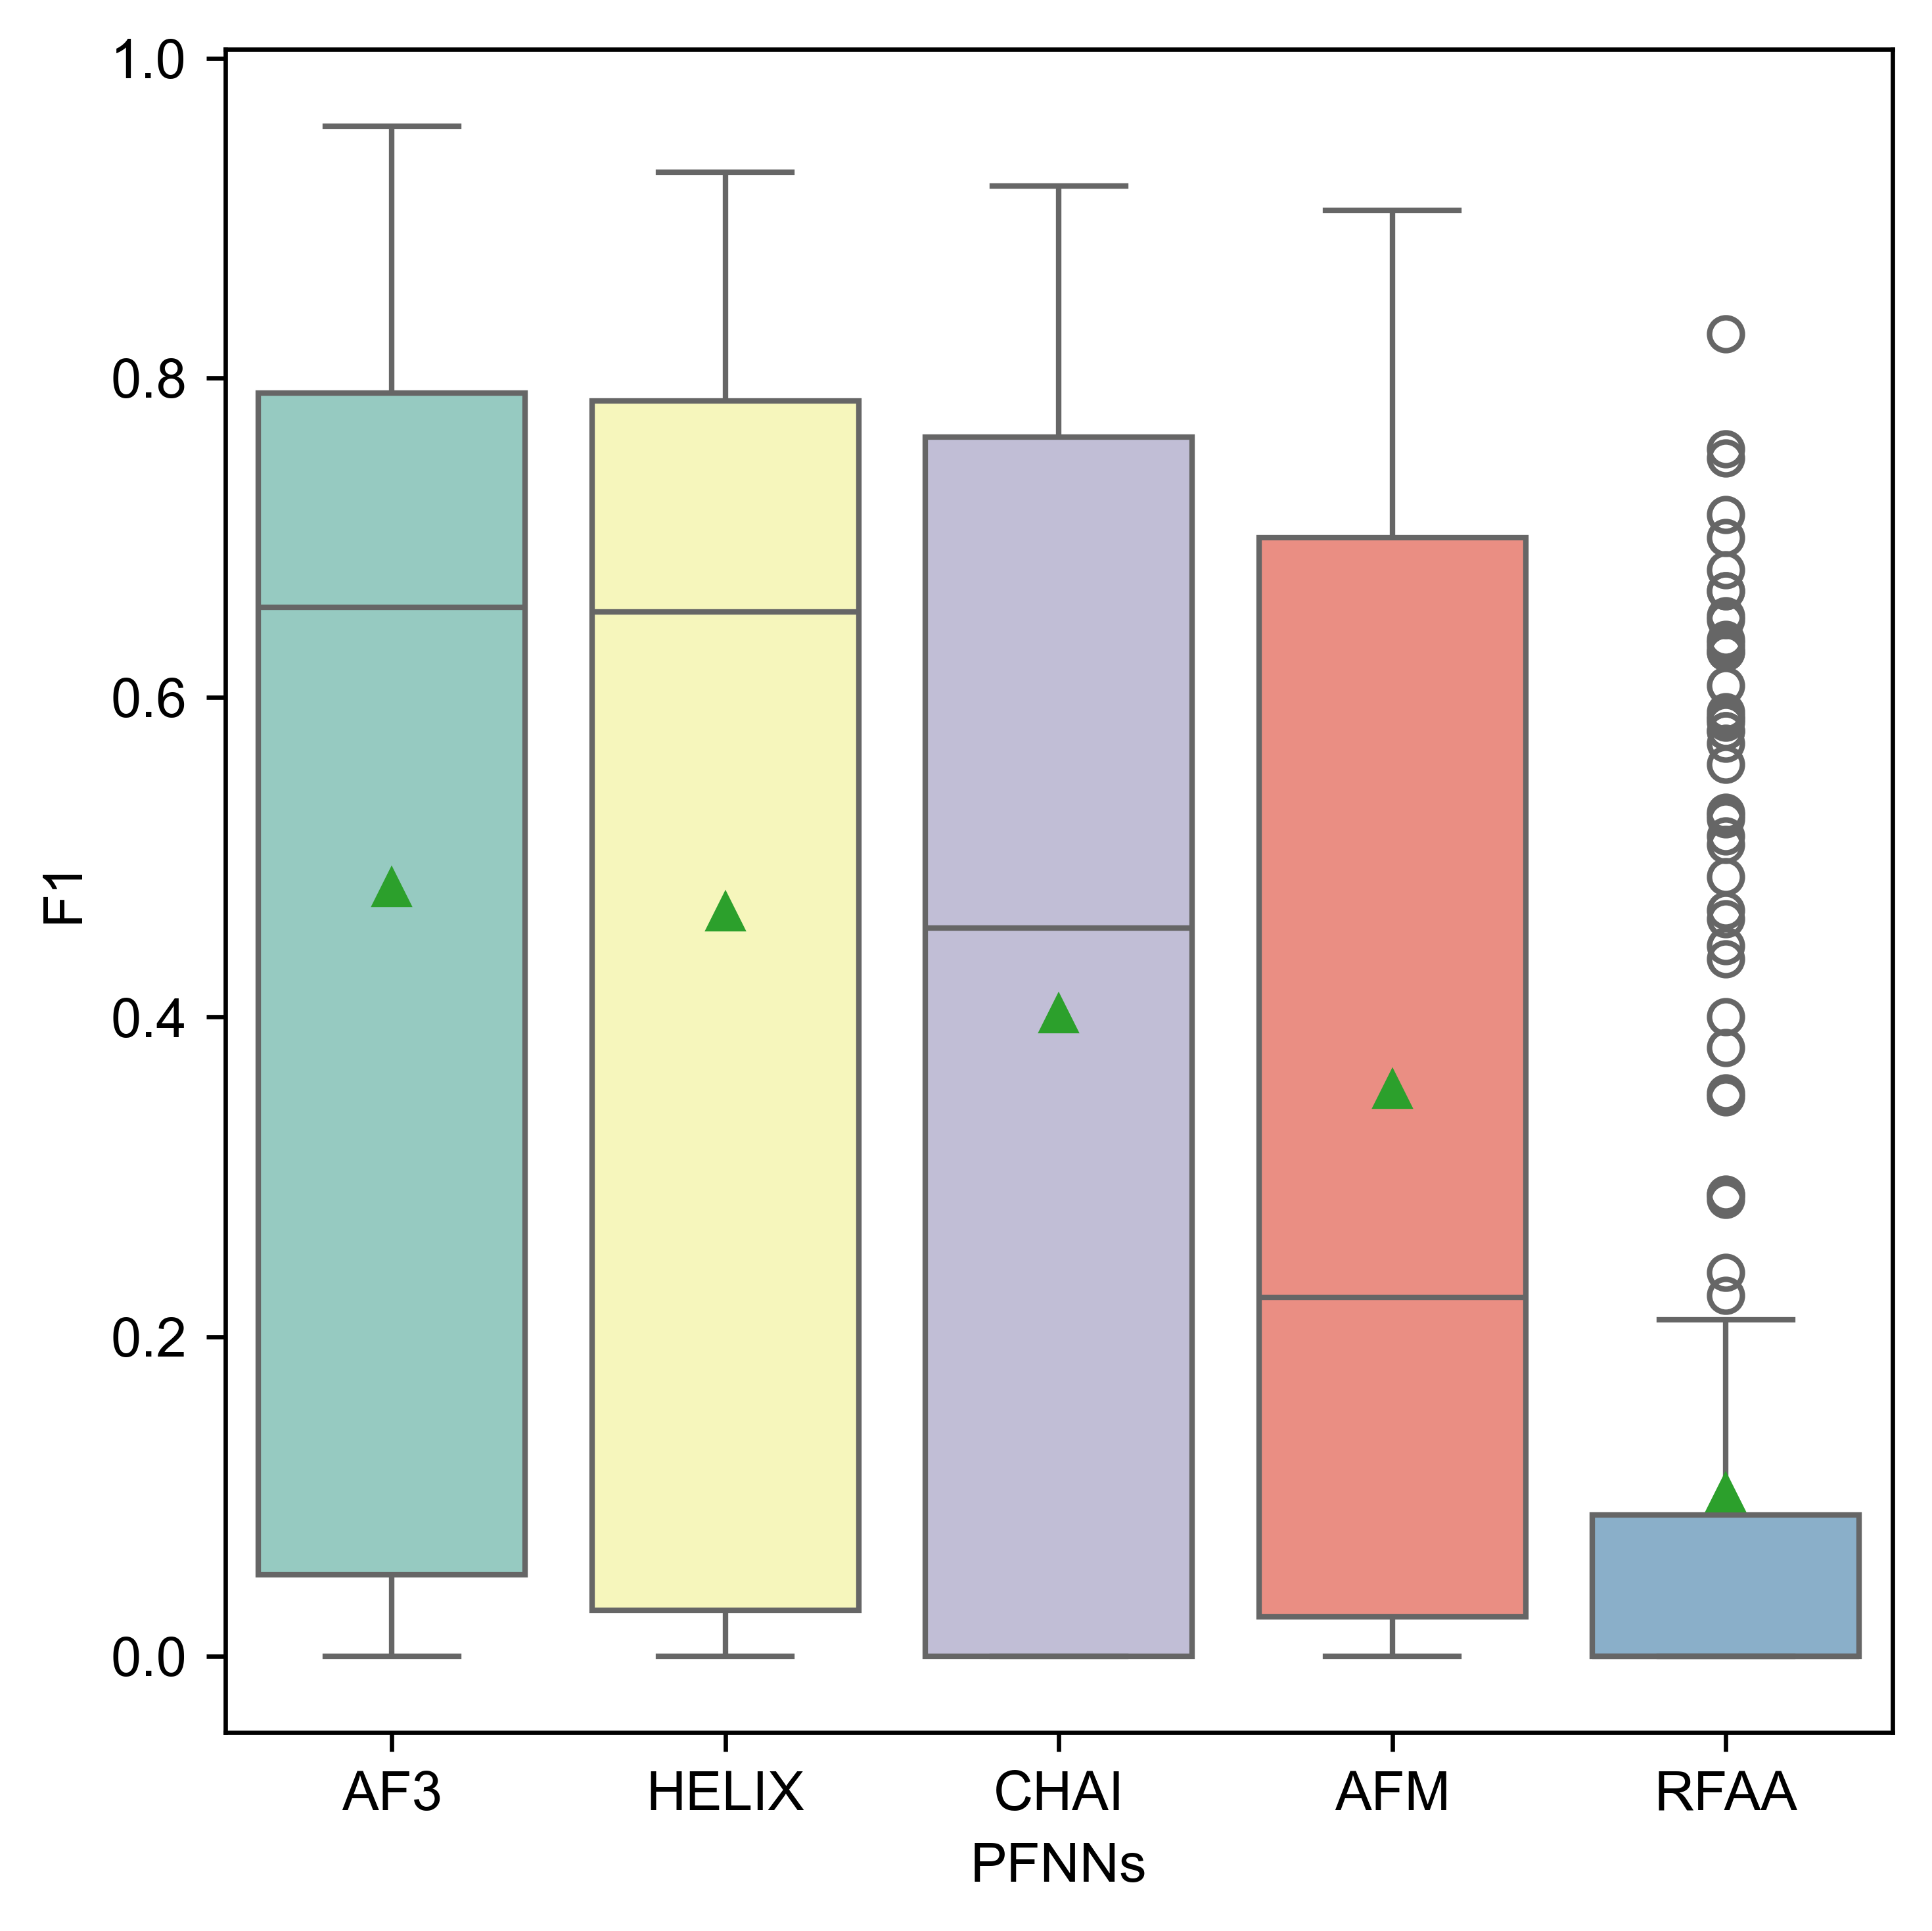

In [33]:
plot_dockq(df_dockq_full, "F1")

Model: af3, Mean iRMSD: 5.190321624999905, Min iRMSD: 0.3213067265809231, Max iRMSD: 26.94102375912576, Median iRMSD: 2.3818212593516708
Model: afm, Mean iRMSD: 5.929339301570118, Min iRMSD: 0.3628157993442883, Max iRMSD: 29.79811394813557, Median iRMSD: 4.020690691432186
Model: chai, Mean iRMSD: 6.386337319459647, Min iRMSD: 0.333417078037749, Max iRMSD: 28.914419333064664, Median iRMSD: 5.023031620380509
Model: helix, Mean iRMSD: 5.990126254404621, Min iRMSD: 0.3256285159682818, Max iRMSD: 31.03658230167799, Median iRMSD: 2.847426924958196
Model: rfaa, Mean iRMSD: 11.503289986381954, Min iRMSD: 0.6003393974944004, Max iRMSD: 40.950782304008456, Median iRMSD: 10.328671856957524


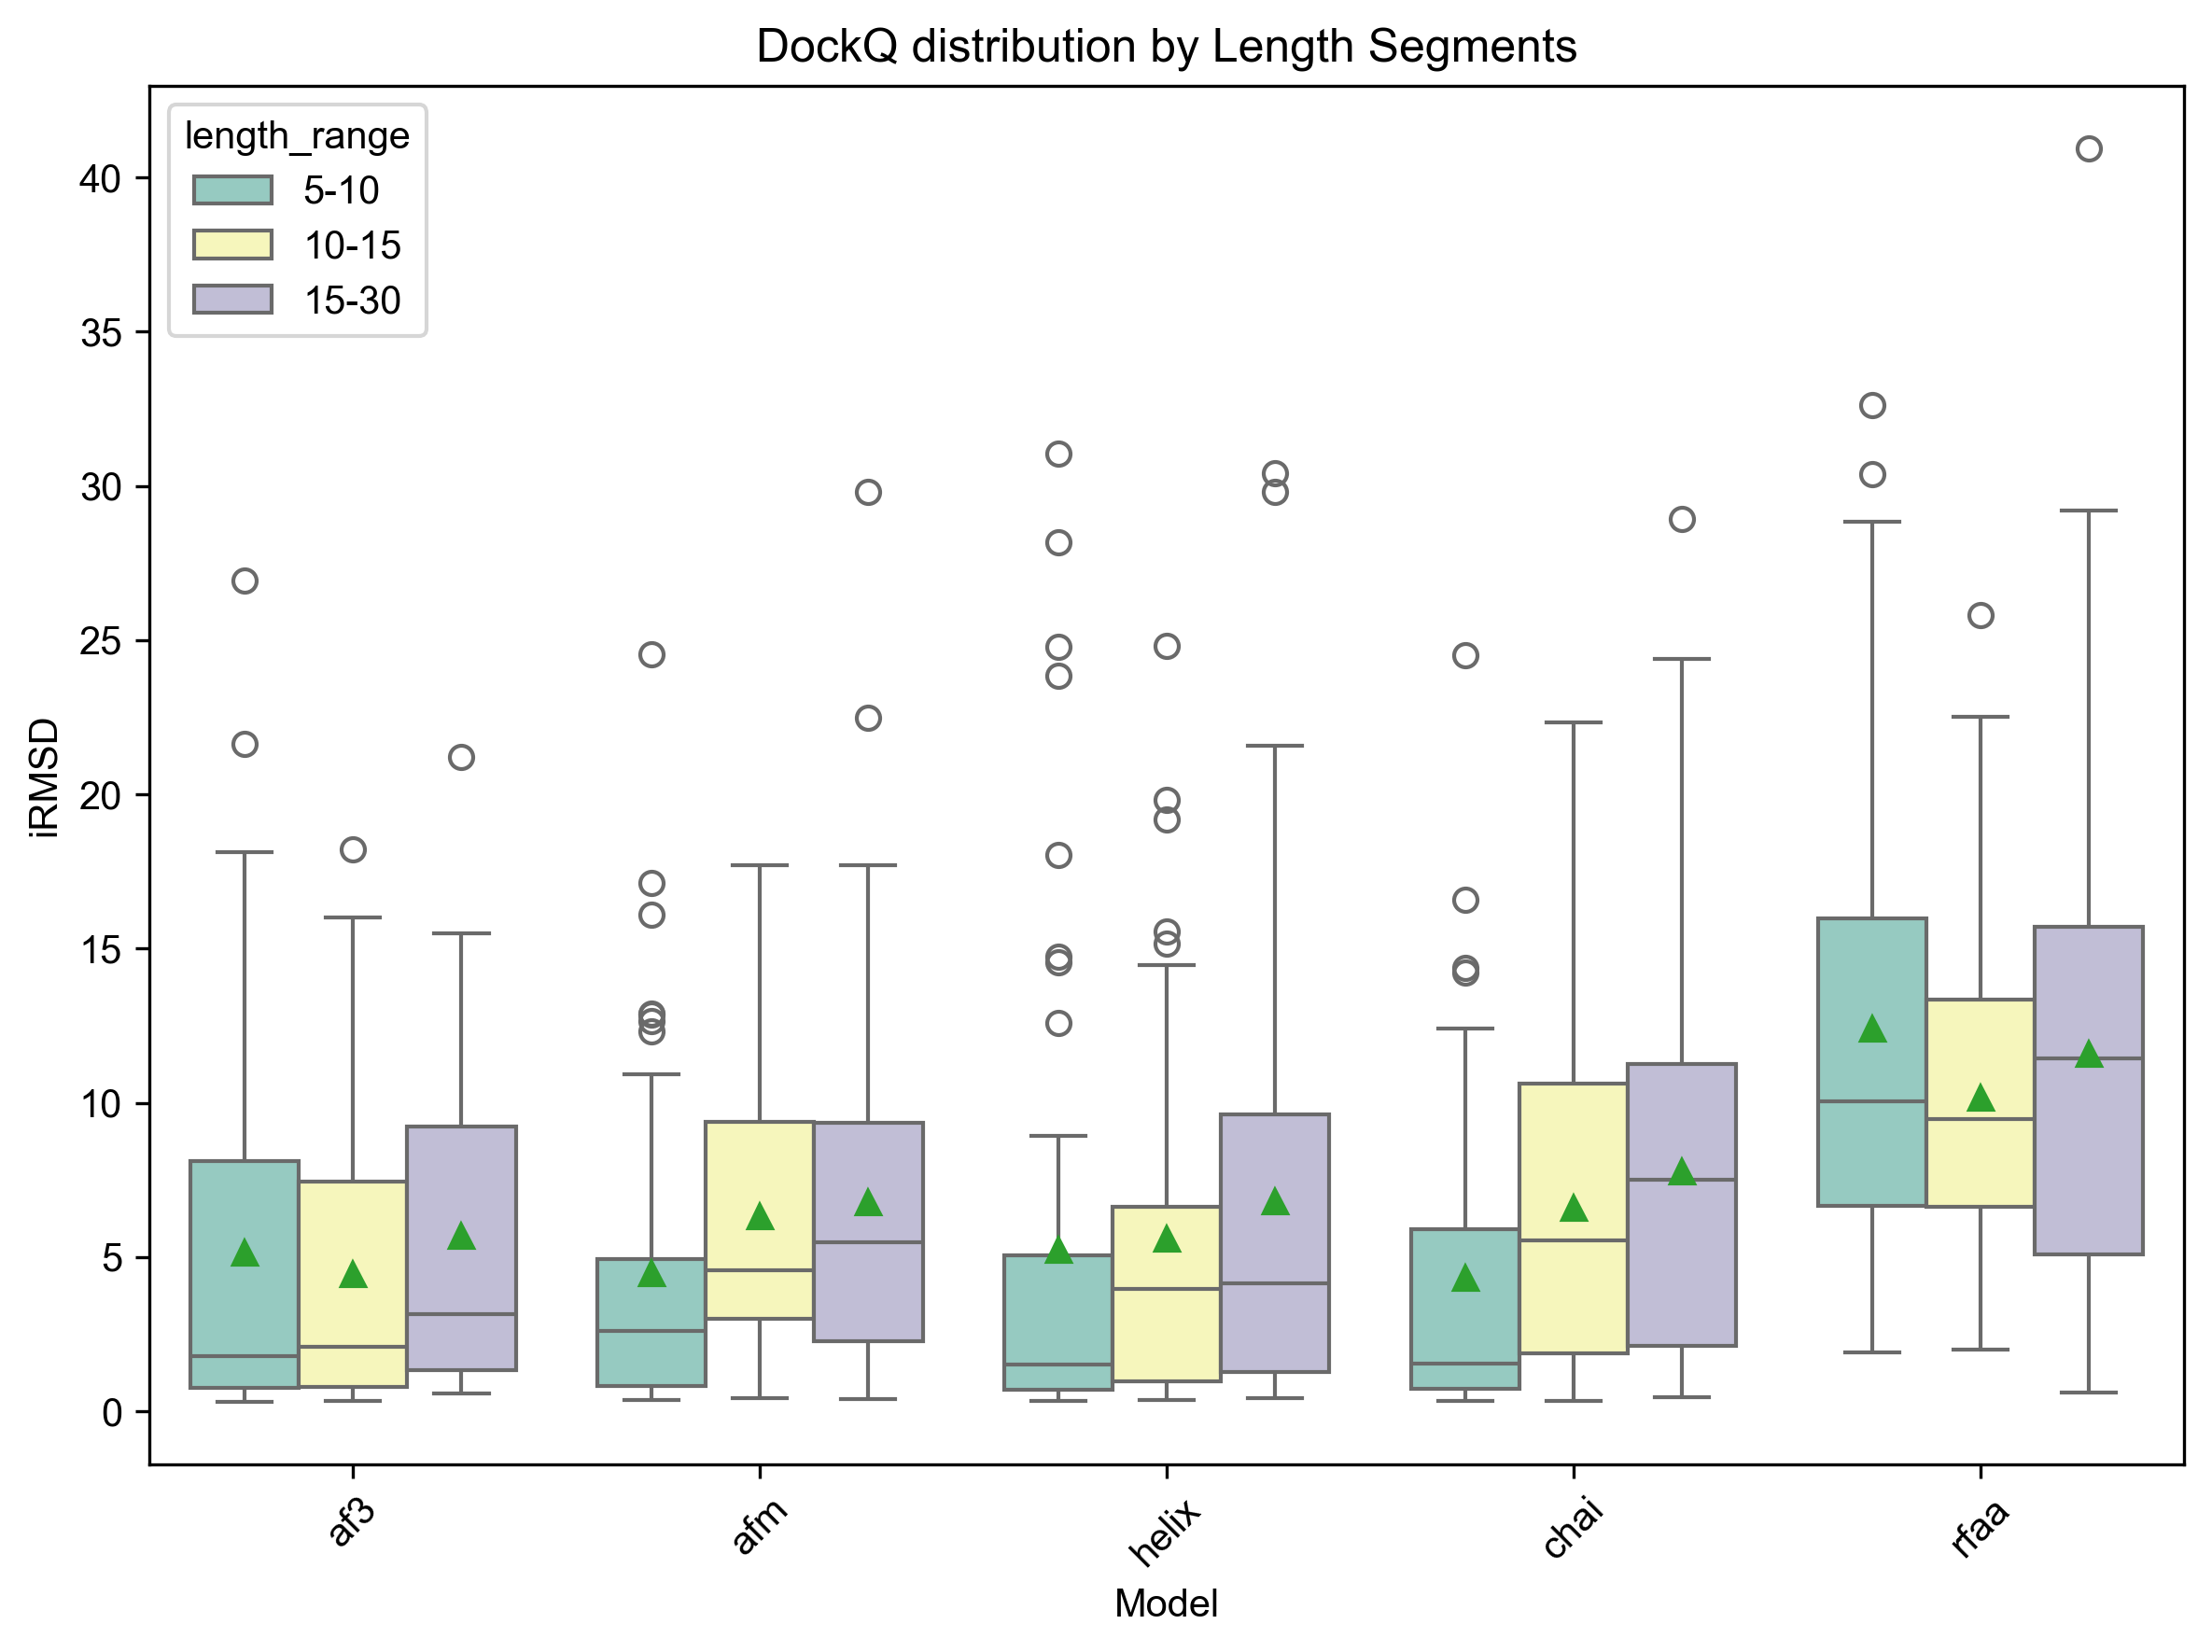

In [34]:
plot_dockq_with_pep_len(df_dockq_core, "iRMSD")

Model: af3, Mean iRMSD: 5.255175839838656, Min iRMSD: 0.3213067265809231, Max iRMSD: 26.94102375912576, Median iRMSD: 2.413418897250695
Model: afm, Mean iRMSD: 5.984743370206765, Min iRMSD: 0.3628157993442883, Max iRMSD: 29.79811394813557, Median iRMSD: 4.032038932437031
Model: chai, Mean iRMSD: 6.652477867827174, Min iRMSD: 0.333417078037749, Max iRMSD: 39.22650974122715, Median iRMSD: 5.06628356922674
Model: helix, Mean iRMSD: 6.0389437329430296, Min iRMSD: 0.3256285159682818, Max iRMSD: 31.03658230167799, Median iRMSD: 2.8513590289821806
Model: rfaa, Mean iRMSD: 11.67402605098562, Min iRMSD: 0.6003393974944004, Max iRMSD: 40.950782304008456, Median iRMSD: 10.36149816475635


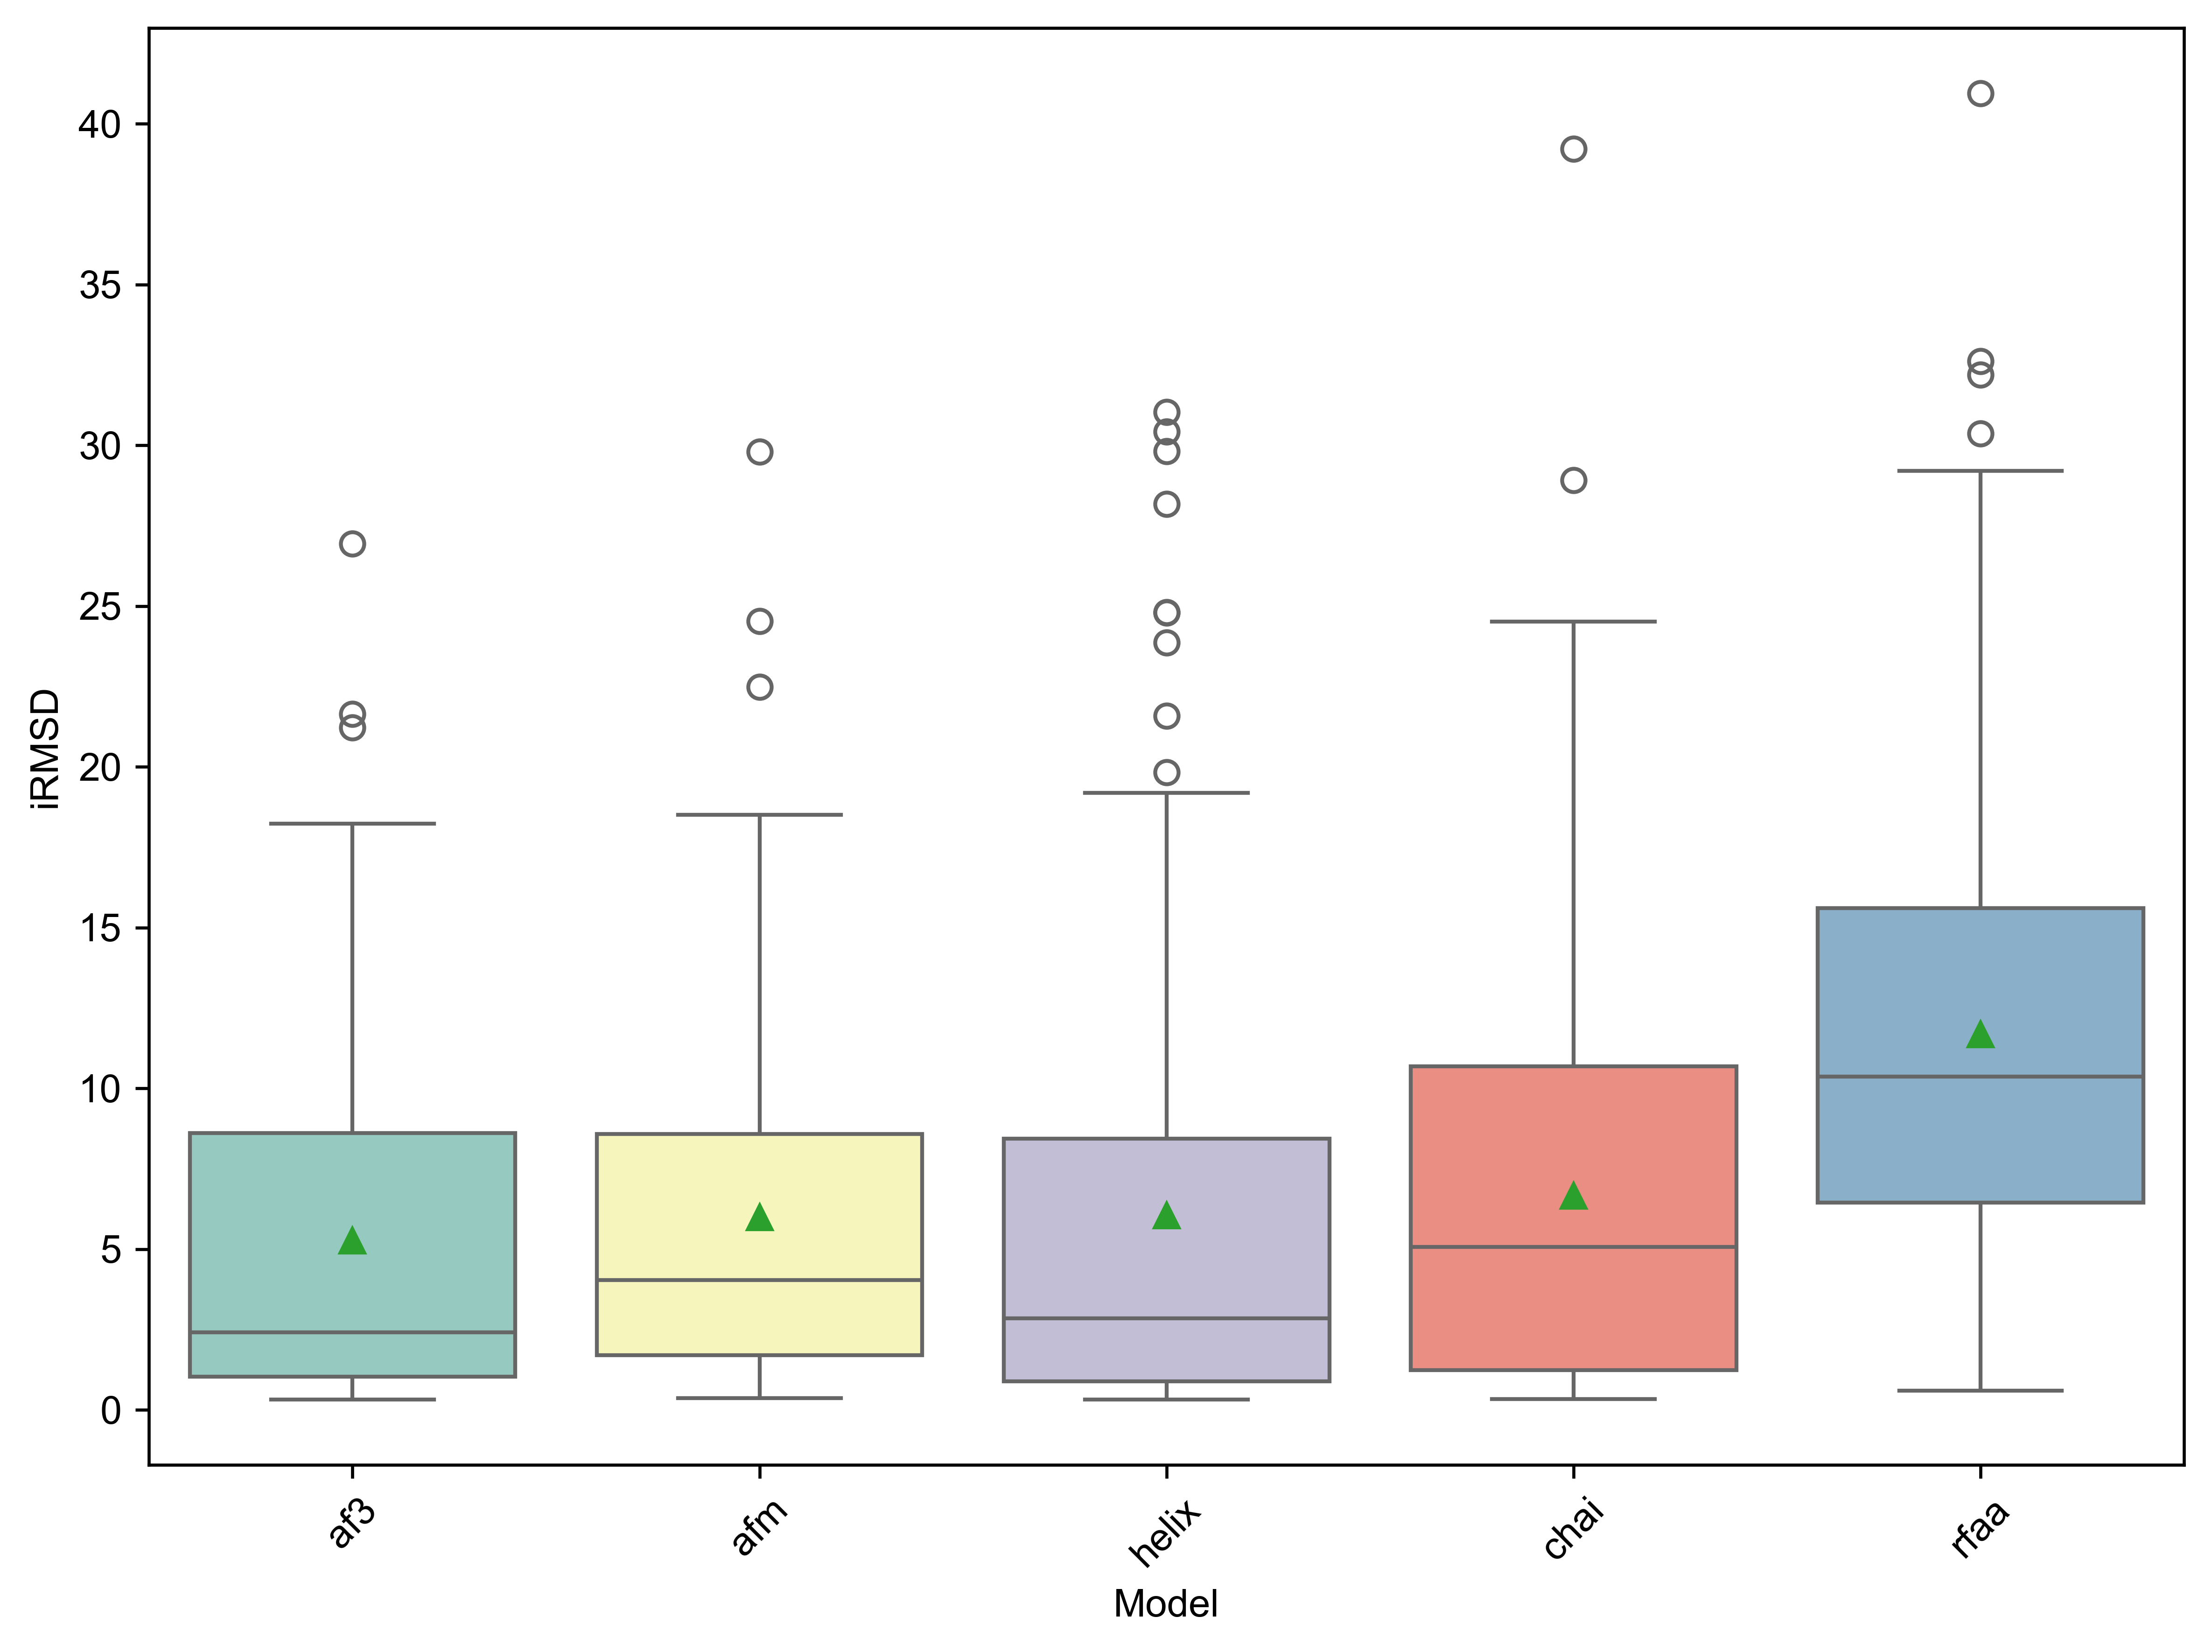

In [35]:
plot_dockq(df_dockq_core, "iRMSD")

Model: af3, Mean LRMSD: 11.656757849490754, Min LRMSD: 0.5735722334153196, Max LRMSD: 63.907314079291744, Median LRMSD: 5.534155613725873
Model: afm, Mean LRMSD: 12.673278303905025, Min LRMSD: 0.5294356623609837, Max LRMSD: 64.56212219359536, Median LRMSD: 8.998113458025184
Model: chai, Mean LRMSD: 14.043376768300194, Min LRMSD: 0.7062566458690409, Max LRMSD: 62.49896032789112, Median LRMSD: 10.933965540931805
Model: helix, Mean LRMSD: 13.287075698679299, Min LRMSD: 0.5448981317522593, Max LRMSD: 75.74016588752998, Median LRMSD: 6.722759838341785
Model: rfaa, Mean LRMSD: 26.55641277754872, Min LRMSD: 1.0211115347725652, Max LRMSD: 94.3385282654762, Median LRMSD: 24.631313486617024


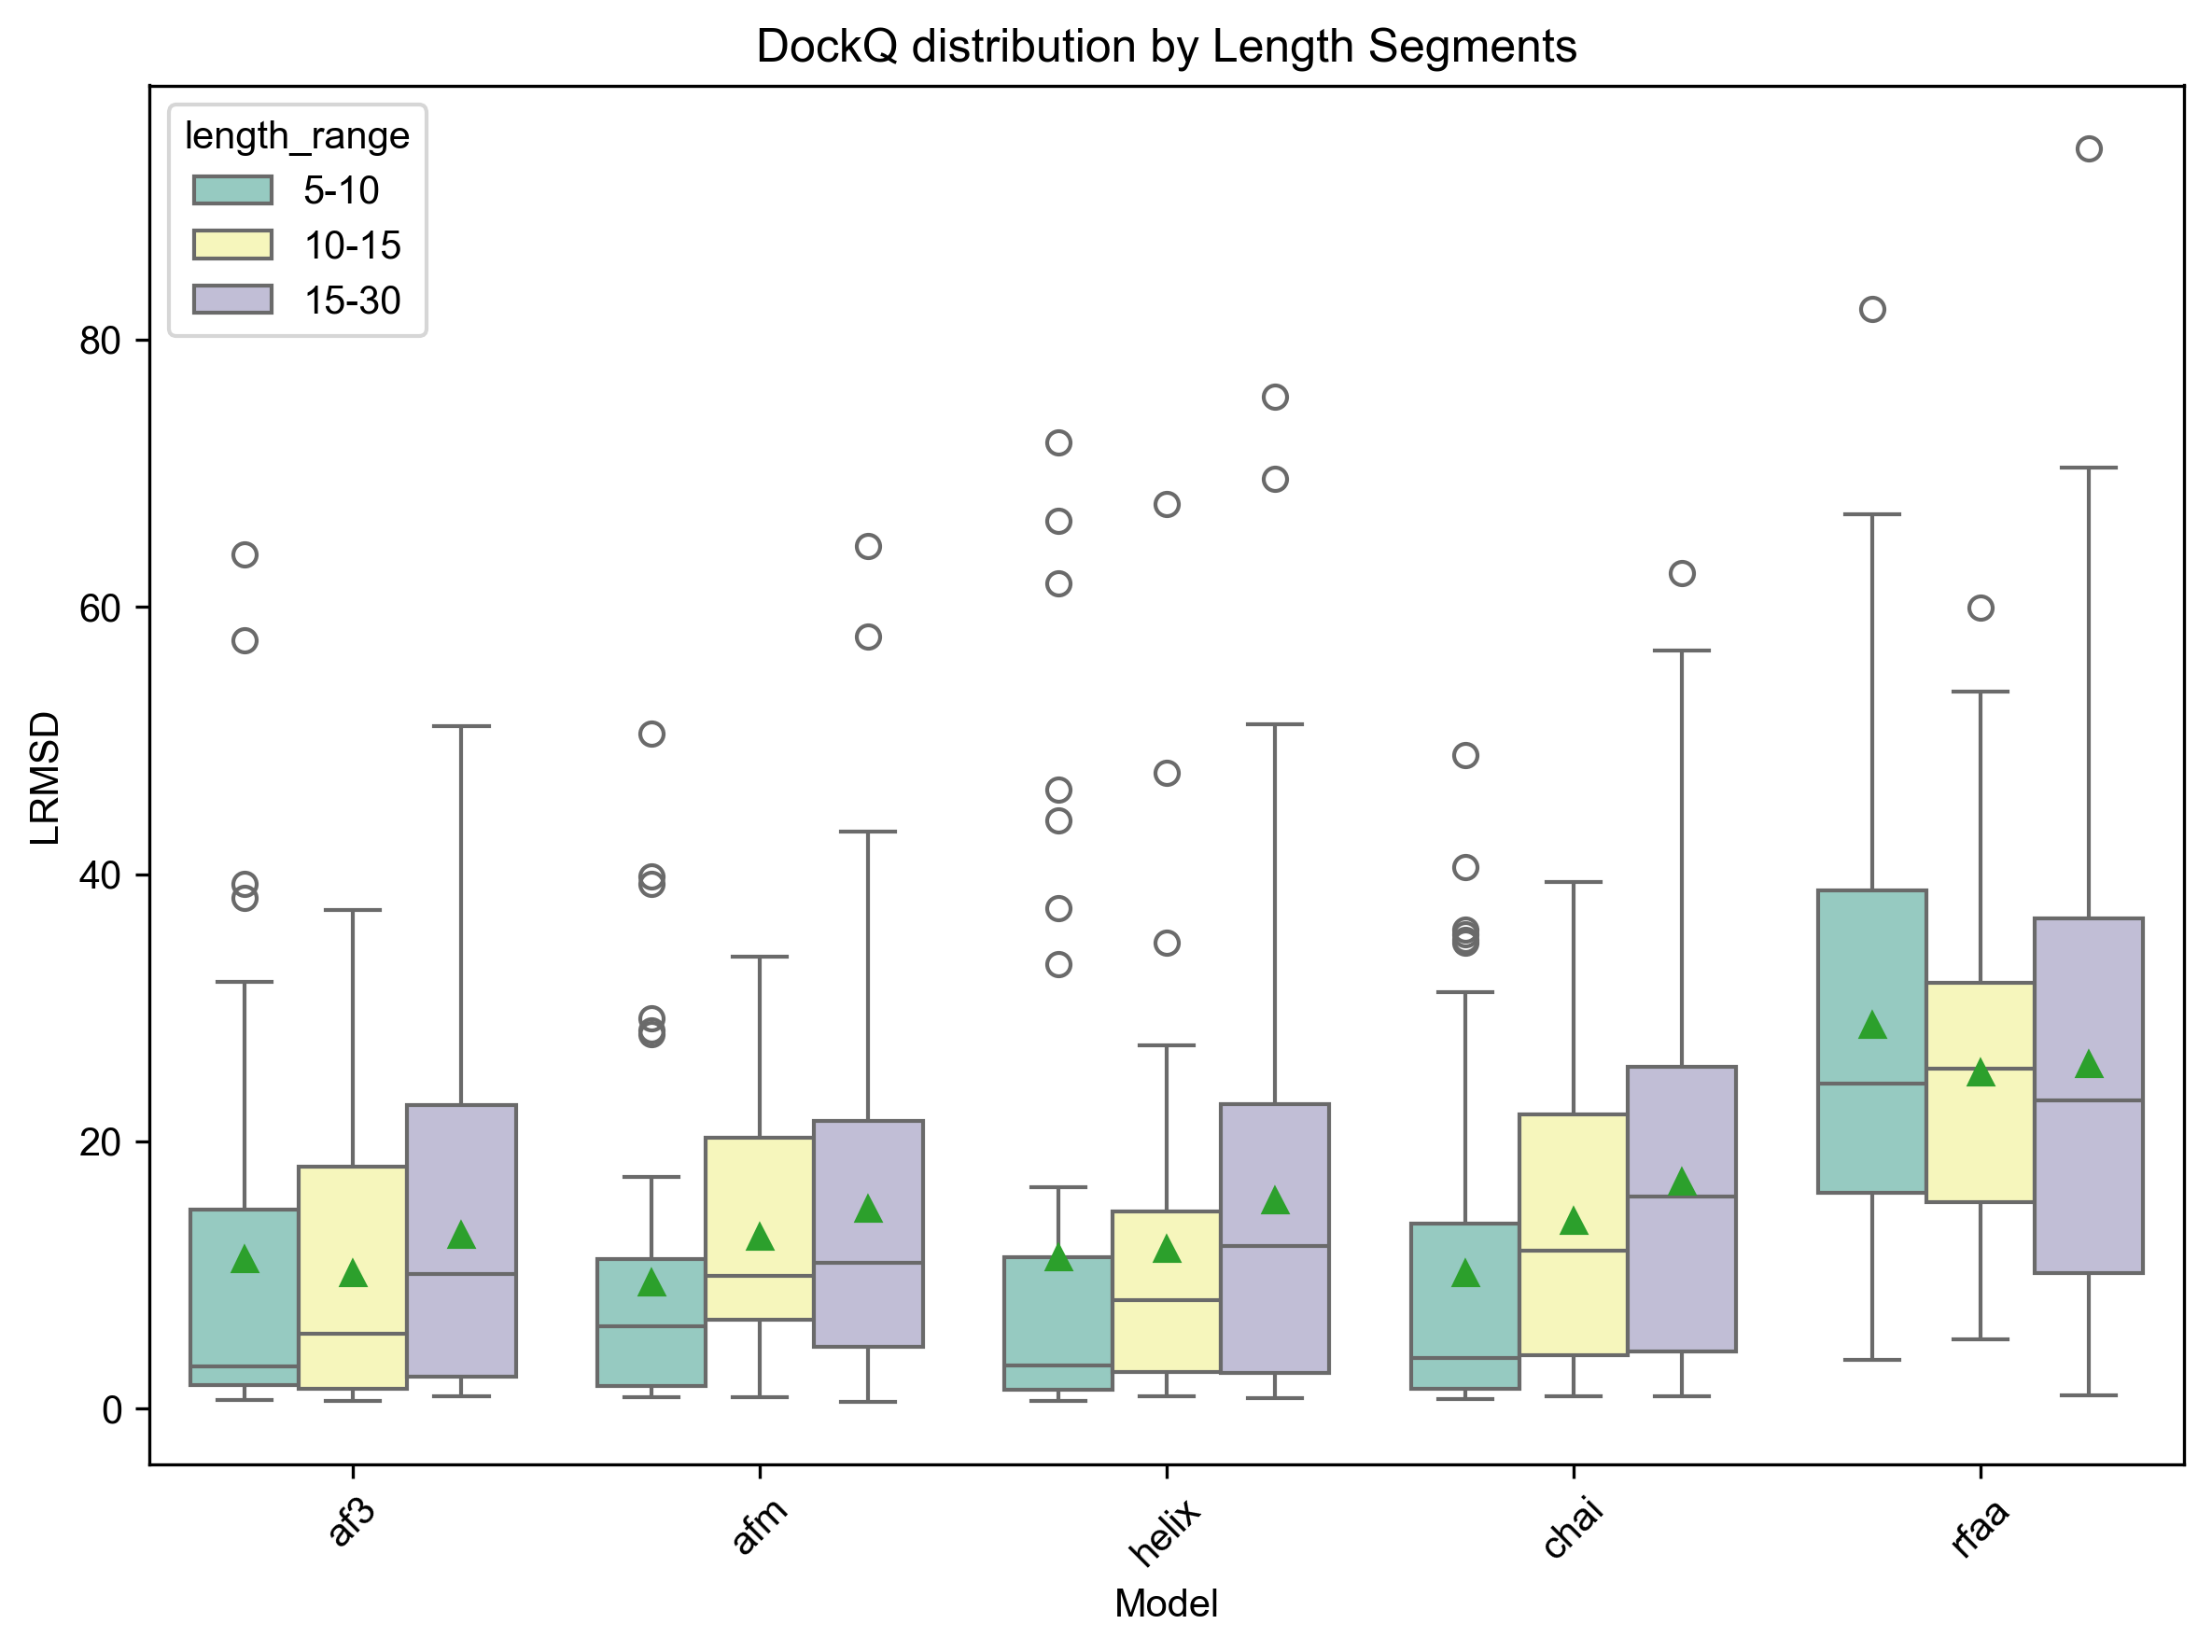

In [36]:
plot_dockq_with_pep_len(df_dockq_core, "LRMSD")

Model: af3, Mean LRMSD: 11.68938402604233, Min LRMSD: 0.5735722334153196, Max LRMSD: 63.907314079291744, Median LRMSD: 5.551857314584743
Model: afm, Mean LRMSD: 12.734617114117949, Min LRMSD: 0.5294356623609837, Max LRMSD: 64.56212219359536, Median LRMSD: 9.02751527870063
Model: chai, Mean LRMSD: 14.473339608213323, Min LRMSD: 0.7062566458690409, Max LRMSD: 89.05438968384745, Median LRMSD: 11.144003845731964
Model: helix, Mean LRMSD: 13.291605591849796, Min LRMSD: 0.5448981317522593, Max LRMSD: 75.74016588752998, Median LRMSD: 6.749631874420953
Model: rfaa, Mean LRMSD: 26.821227881490298, Min LRMSD: 1.0211115347725652, Max LRMSD: 94.3385282654762, Median LRMSD: 24.72878273010016


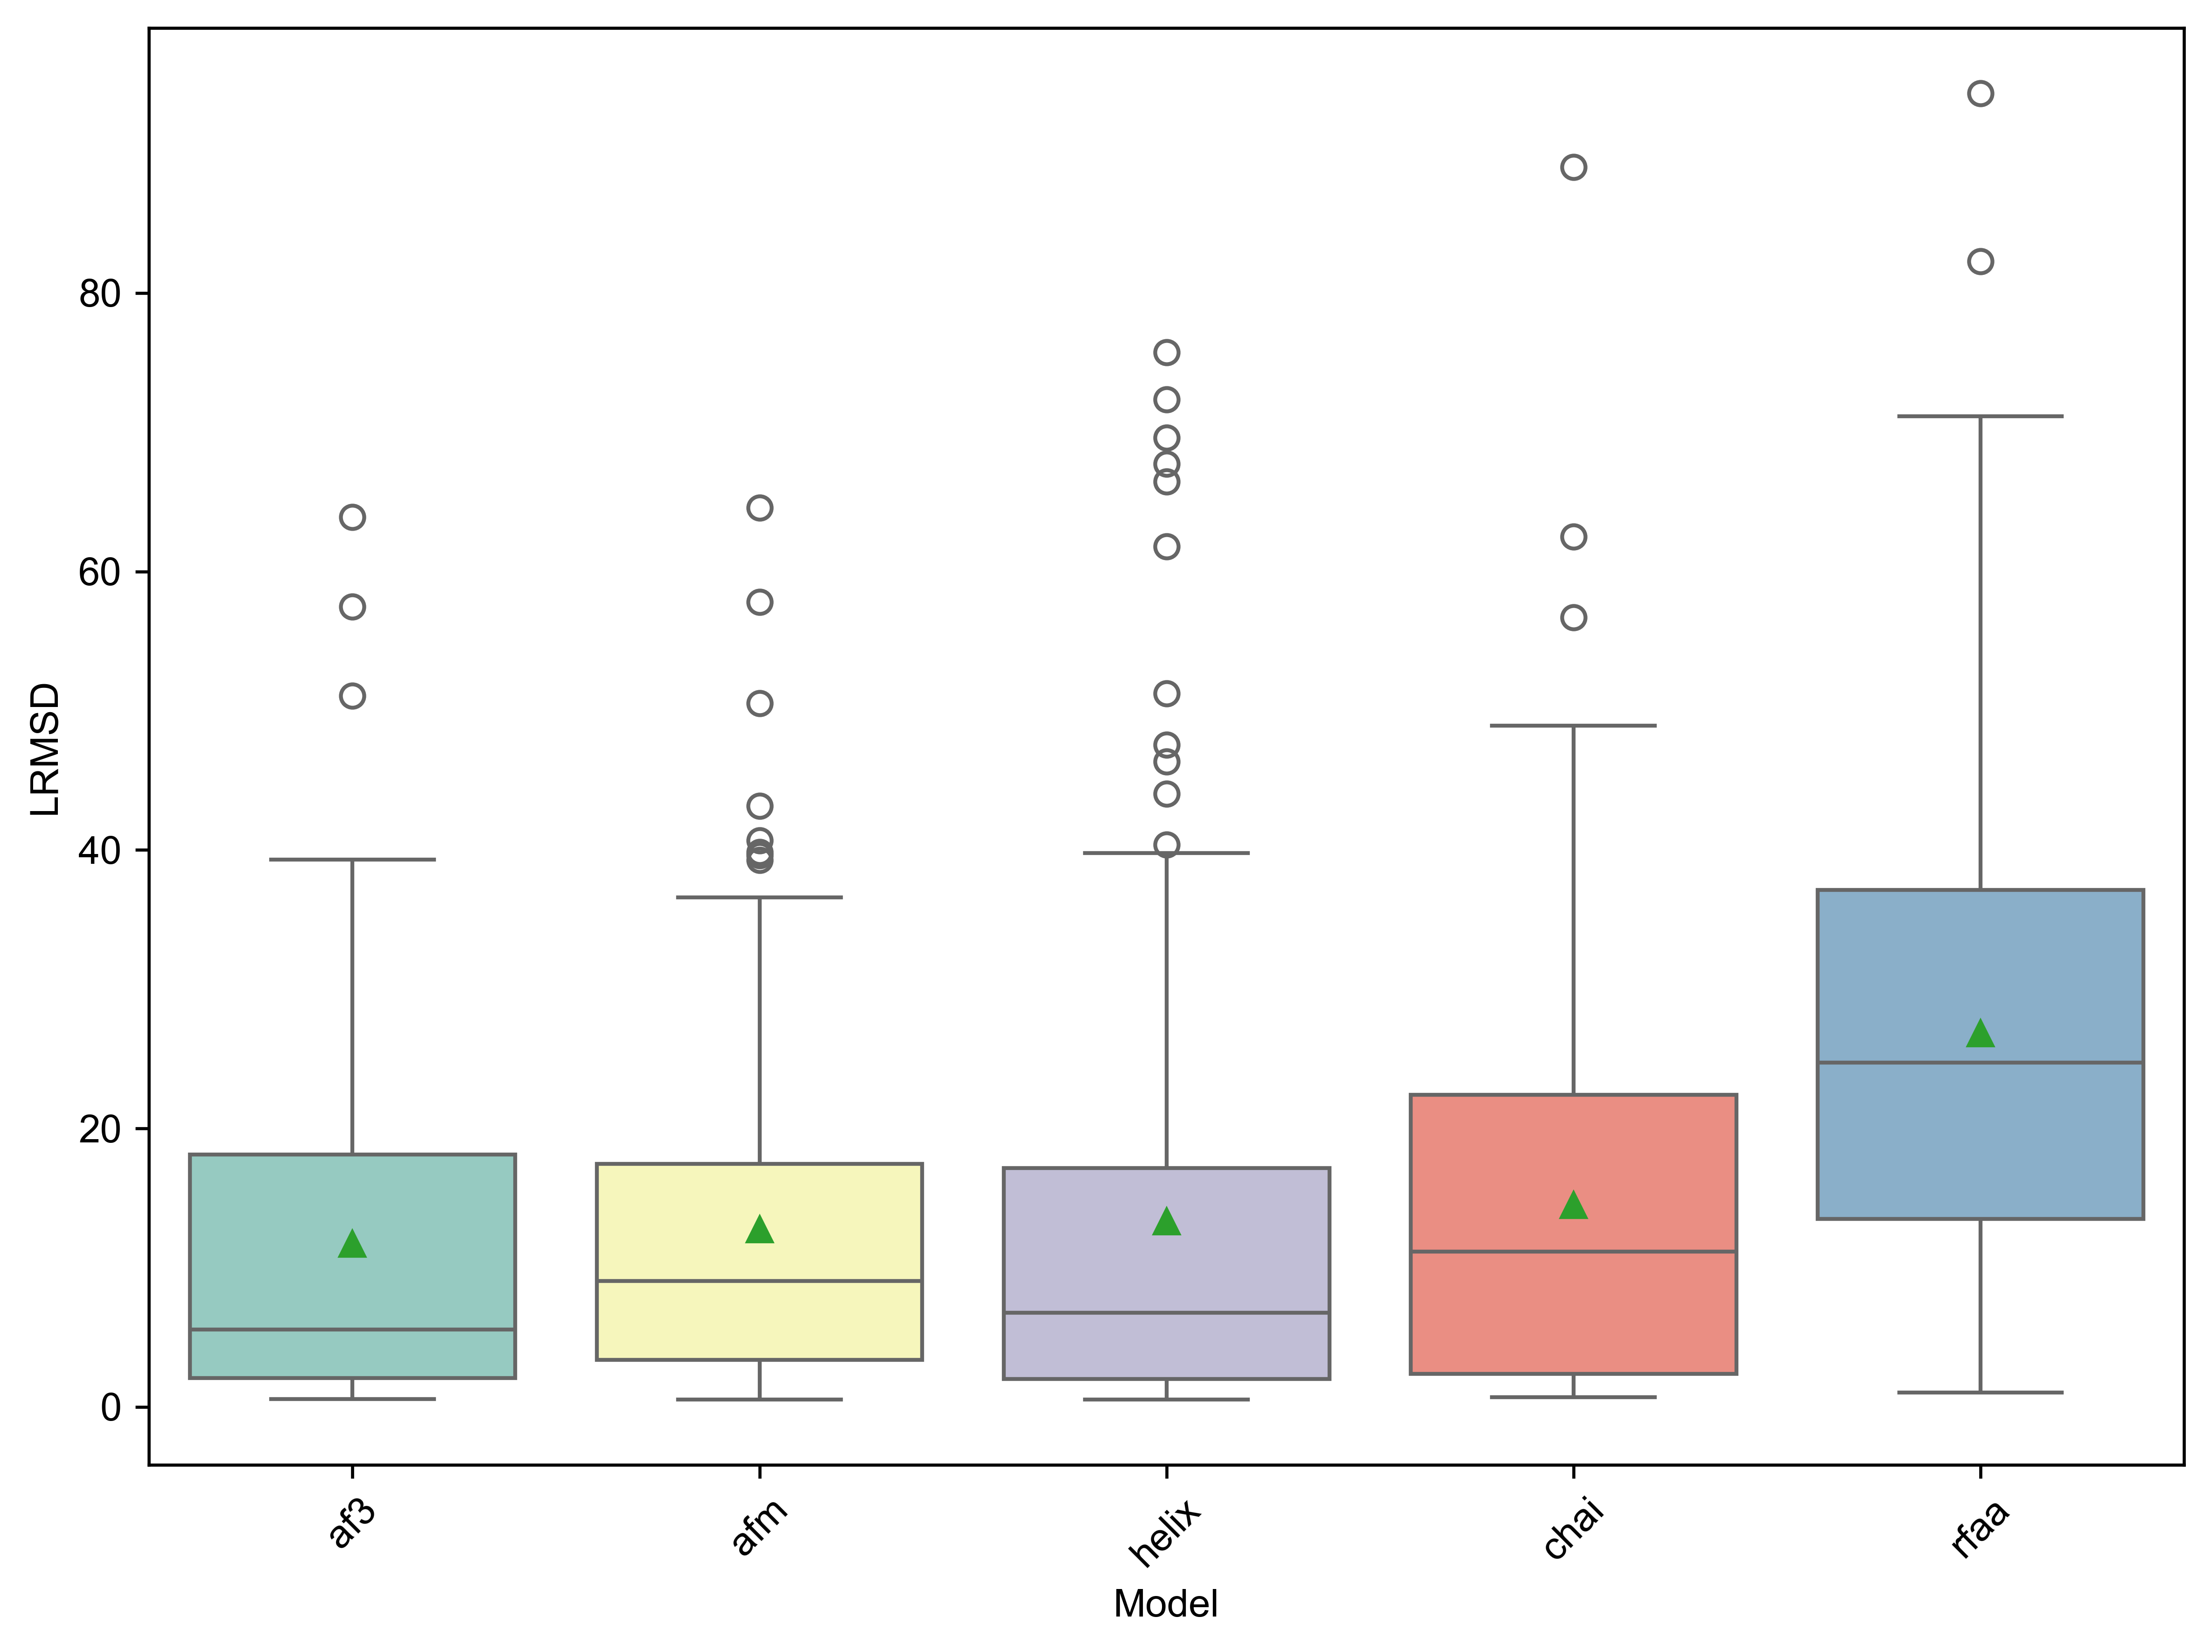

In [37]:
plot_dockq(df_dockq_core, "LRMSD")

Model: af3, Mean fnat: 0.4129017101577848, Min fnat: 0.0, Max fnat: 0.9705882352941176, Median fnat: 0.4201680672268907
Model: afm, Mean fnat: 0.2771561532450759, Min fnat: 0.0, Max fnat: 0.875, Median fnat: 0.12310606060606061
Model: chai, Mean fnat: 0.3220028730429747, Min fnat: 0.0, Max fnat: 0.9230769230769232, Median fnat: 0.140625
Model: helix, Mean fnat: 0.3945562640981613, Min fnat: 0.0, Max fnat: 0.9047619047619048, Median fnat: 0.38988095238095233
Model: rfaa, Mean fnat: 0.06830536375241533, Min fnat: 0.0, Max fnat: 0.7857142857142857, Median fnat: 0.0


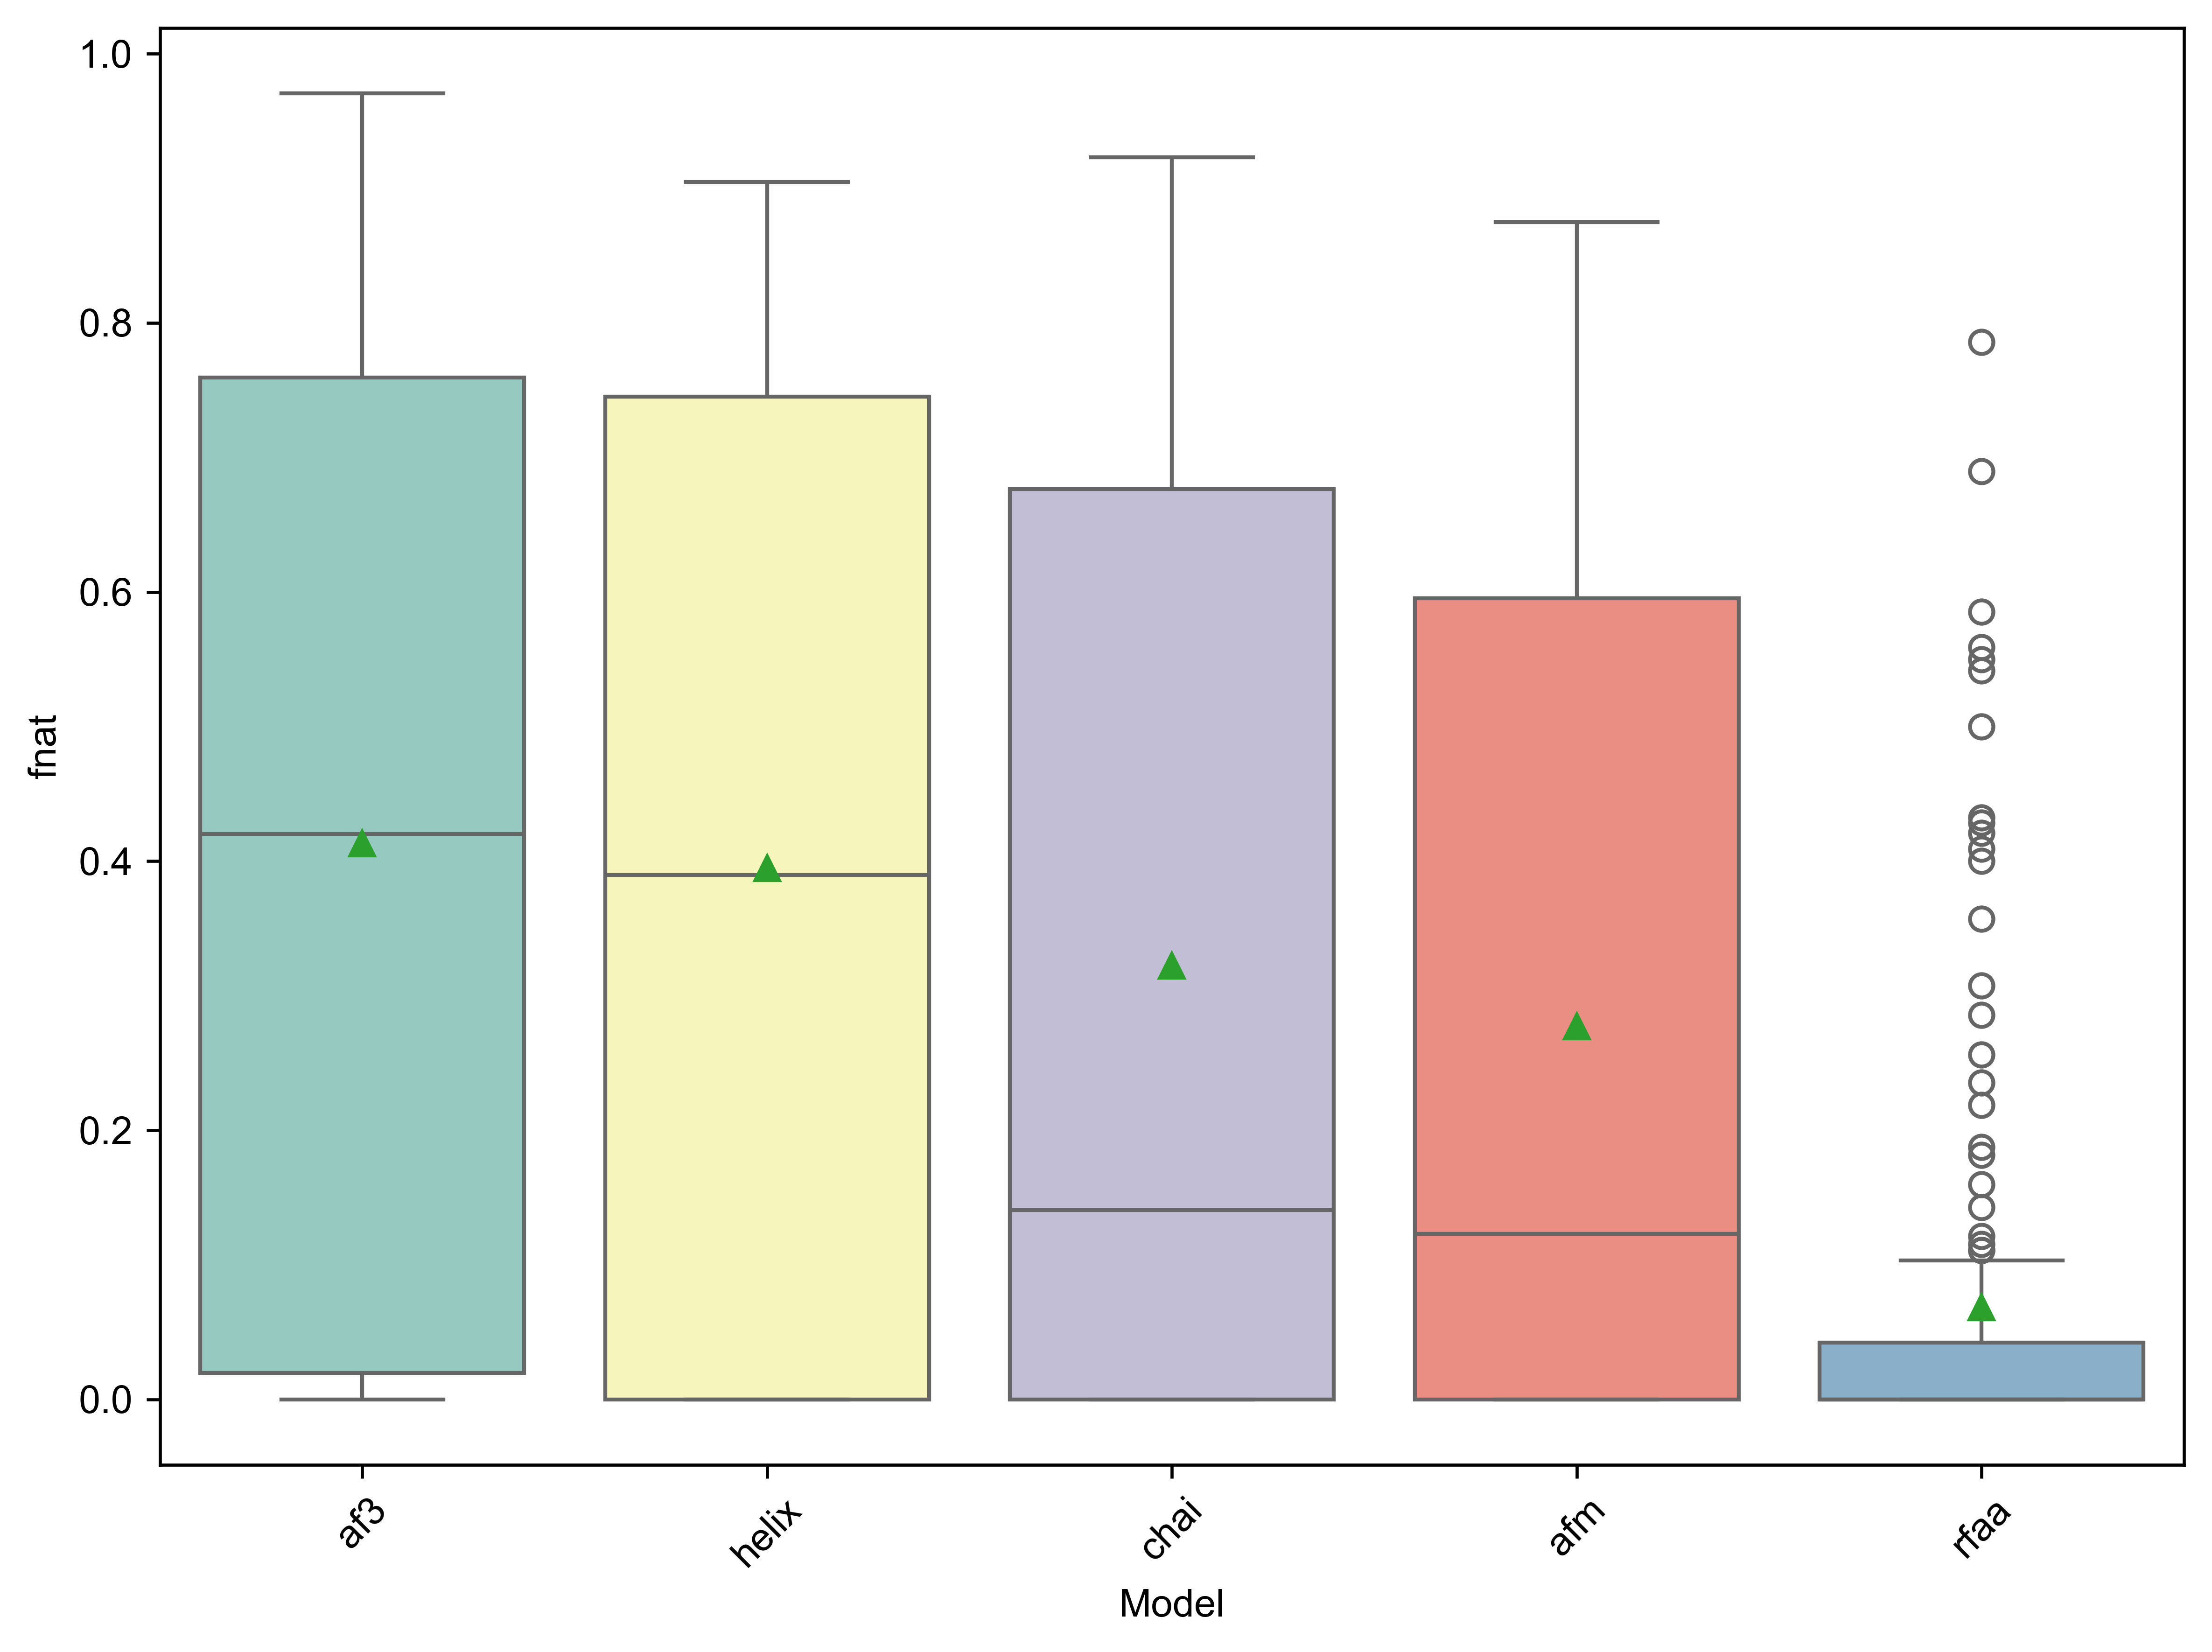

In [38]:
plot_dockq(df_dockq_core, "fnat")

Model: af3, Mean DockQ: 0.5173637934426126, Min DockQ: 0.0047169262692311, Max DockQ: 0.9615410627417076, Median DockQ: 0.6005034675724702
Model: afm, Mean DockQ: 0.4152624636804185, Min DockQ: 0.0028131130246488, Max DockQ: 0.946827617709549, Median DockQ: 0.33523968180946334
Model: chai, Mean DockQ: 0.44566793214639466, Min DockQ: 0.0029222957553897, Max DockQ: 0.9561209262870146, Median DockQ: 0.4453401072906862
Model: helix, Mean DockQ: 0.5047266044629571, Min DockQ: 0.0049545386985102, Max DockQ: 0.9533943516548024, Median DockQ: 0.5797154171805131
Model: rfaa, Mean DockQ: 0.1449361035214984, Min DockQ: 0.0031309114919034, Max DockQ: 0.8778075379070017, Median DockQ: 0.0581185098339953


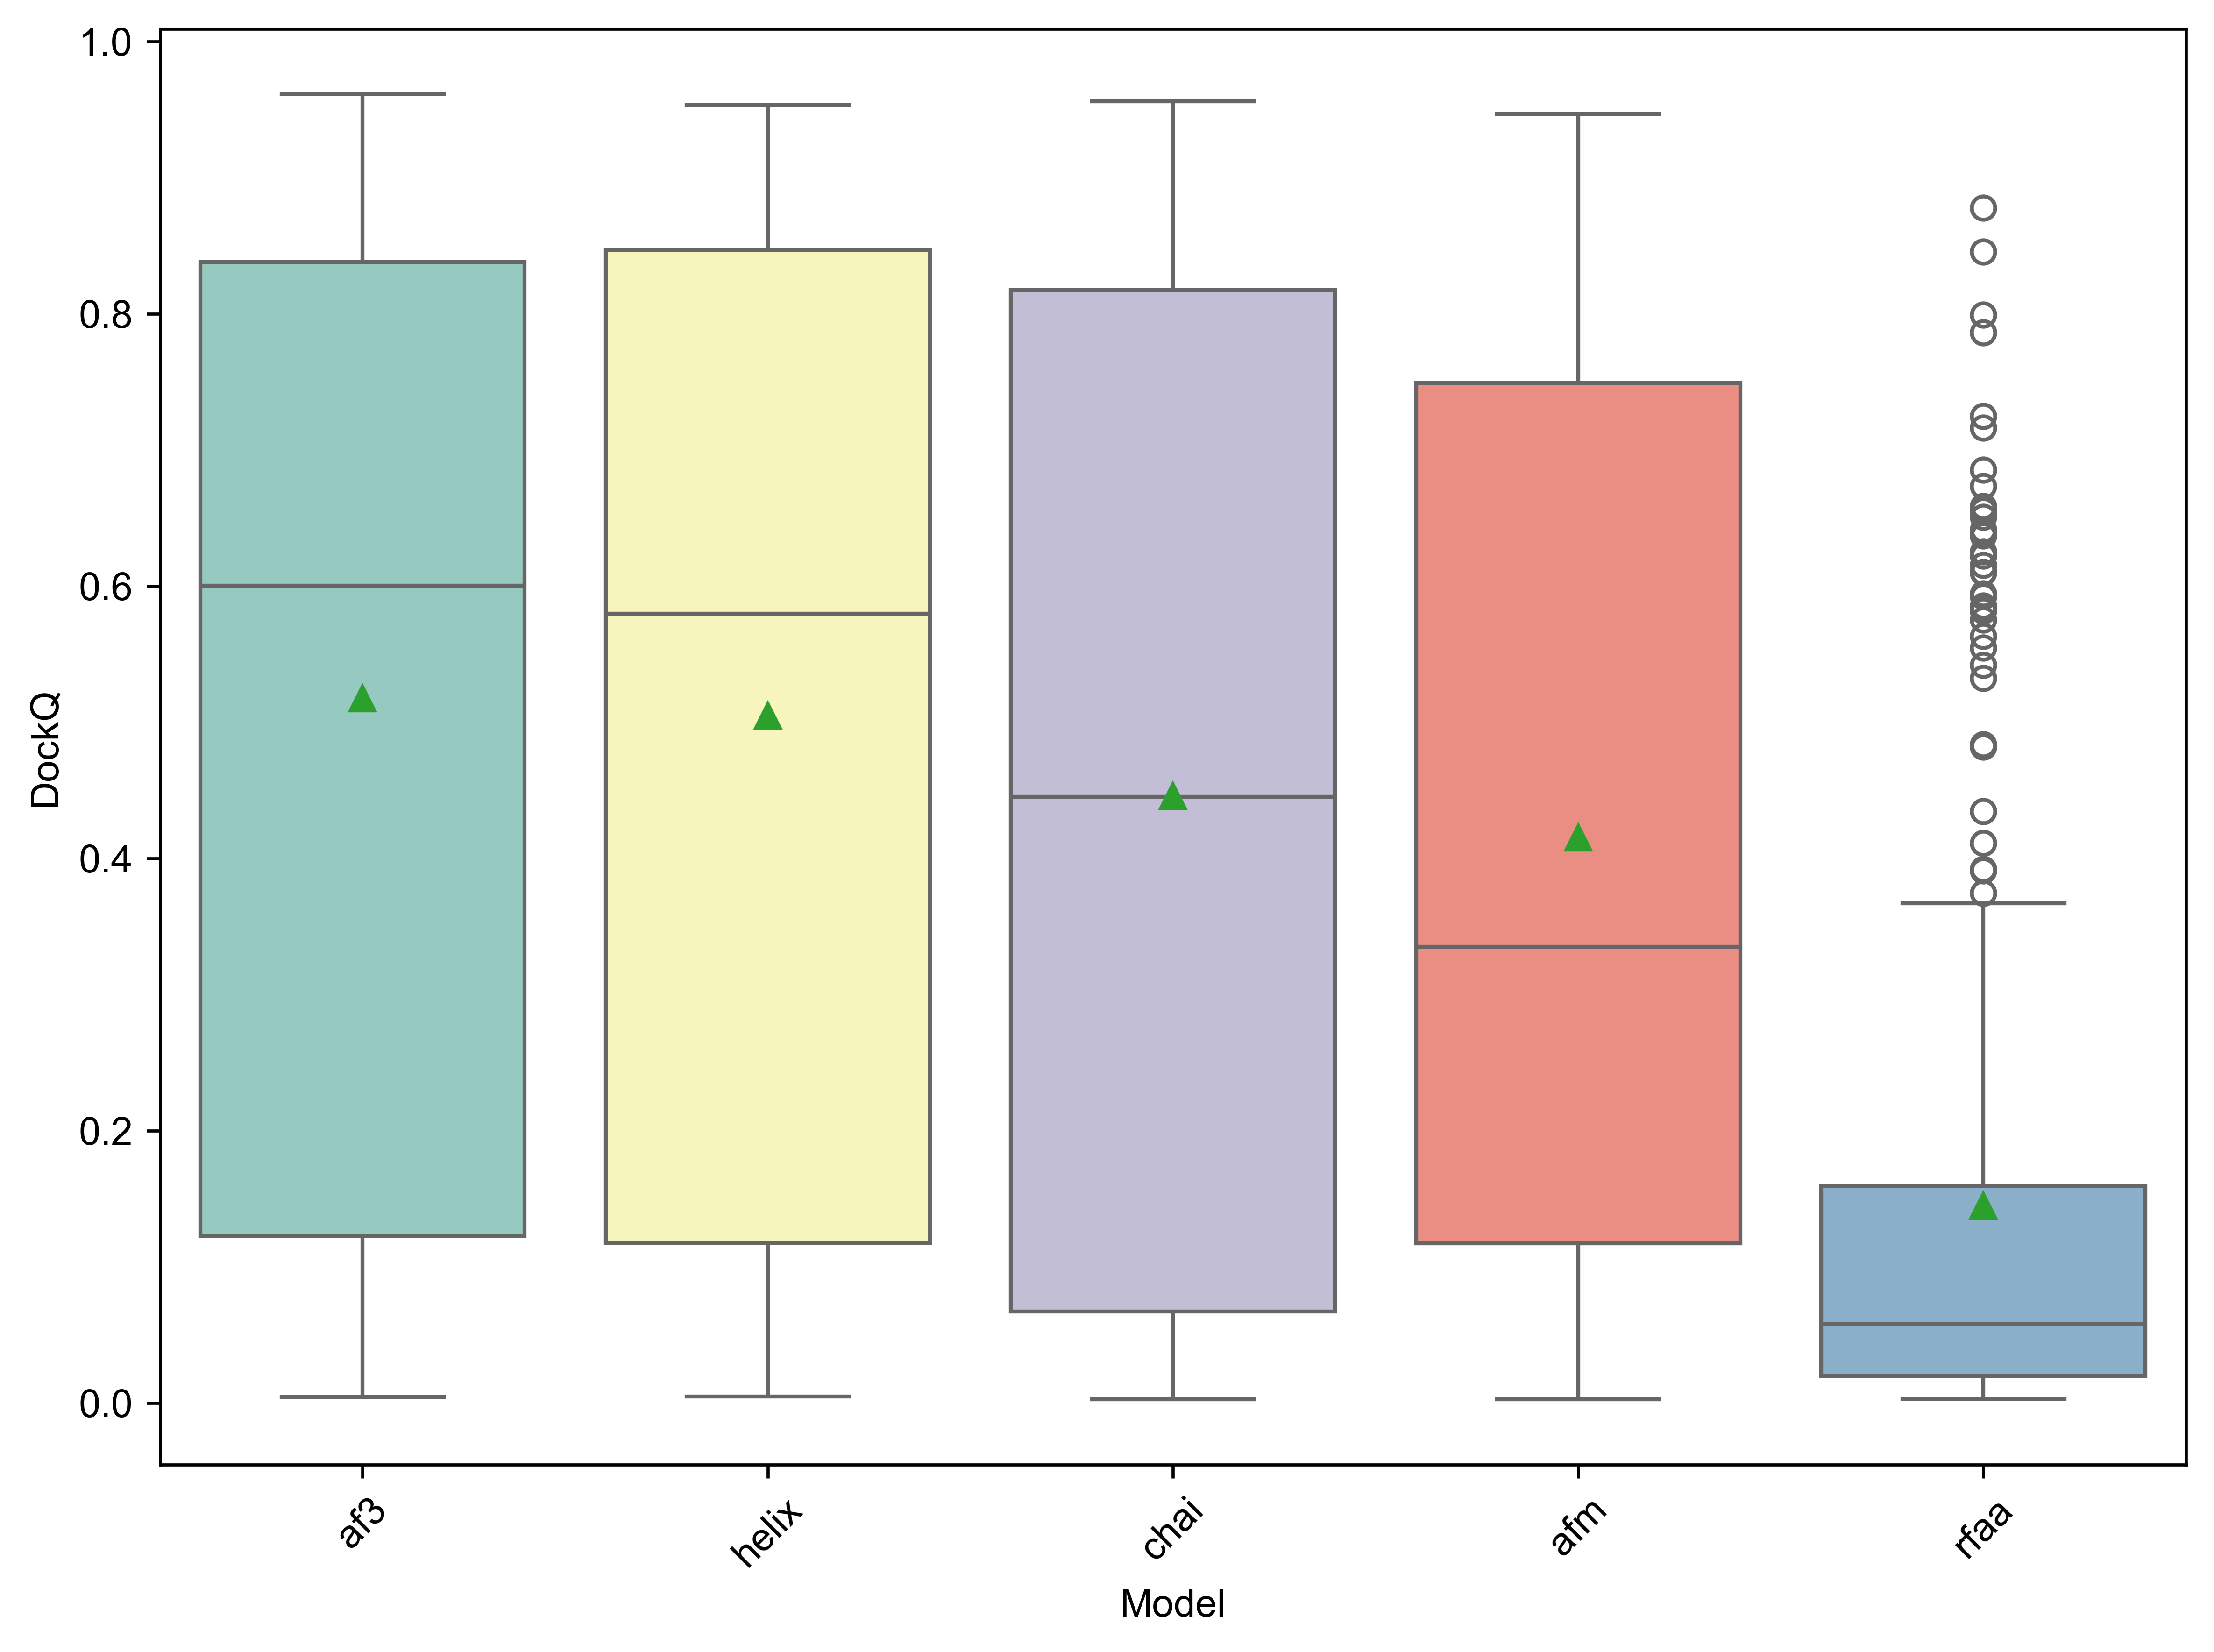

In [39]:
plot_dockq(df_dockq, "DockQ")

Model: af3, Mean F1: 0.48074495103410486, Min F1: 0.0, Max F1: 0.9577464788732394, Median F1: 0.6564402810304449
Model: afm, Mean F1: 0.3544079659906725, Min F1: 0.0, Max F1: 0.9047619047619048, Median F1: 0.2247474747474747
Model: chai, Mean F1: 0.4017206541944875, Min F1: 0.0, Max F1: 0.92, Median F1: 0.45558176100628933
Model: helix, Mean F1: 0.46564201617705714, Min F1: 0.0, Max F1: 0.9285714285714286, Median F1: 0.6537892487259576
Model: rfaa, Mean F1: 0.10206782444323029, Min F1: 0.0, Max F1: 0.8275862068965517, Median F1: 0.0


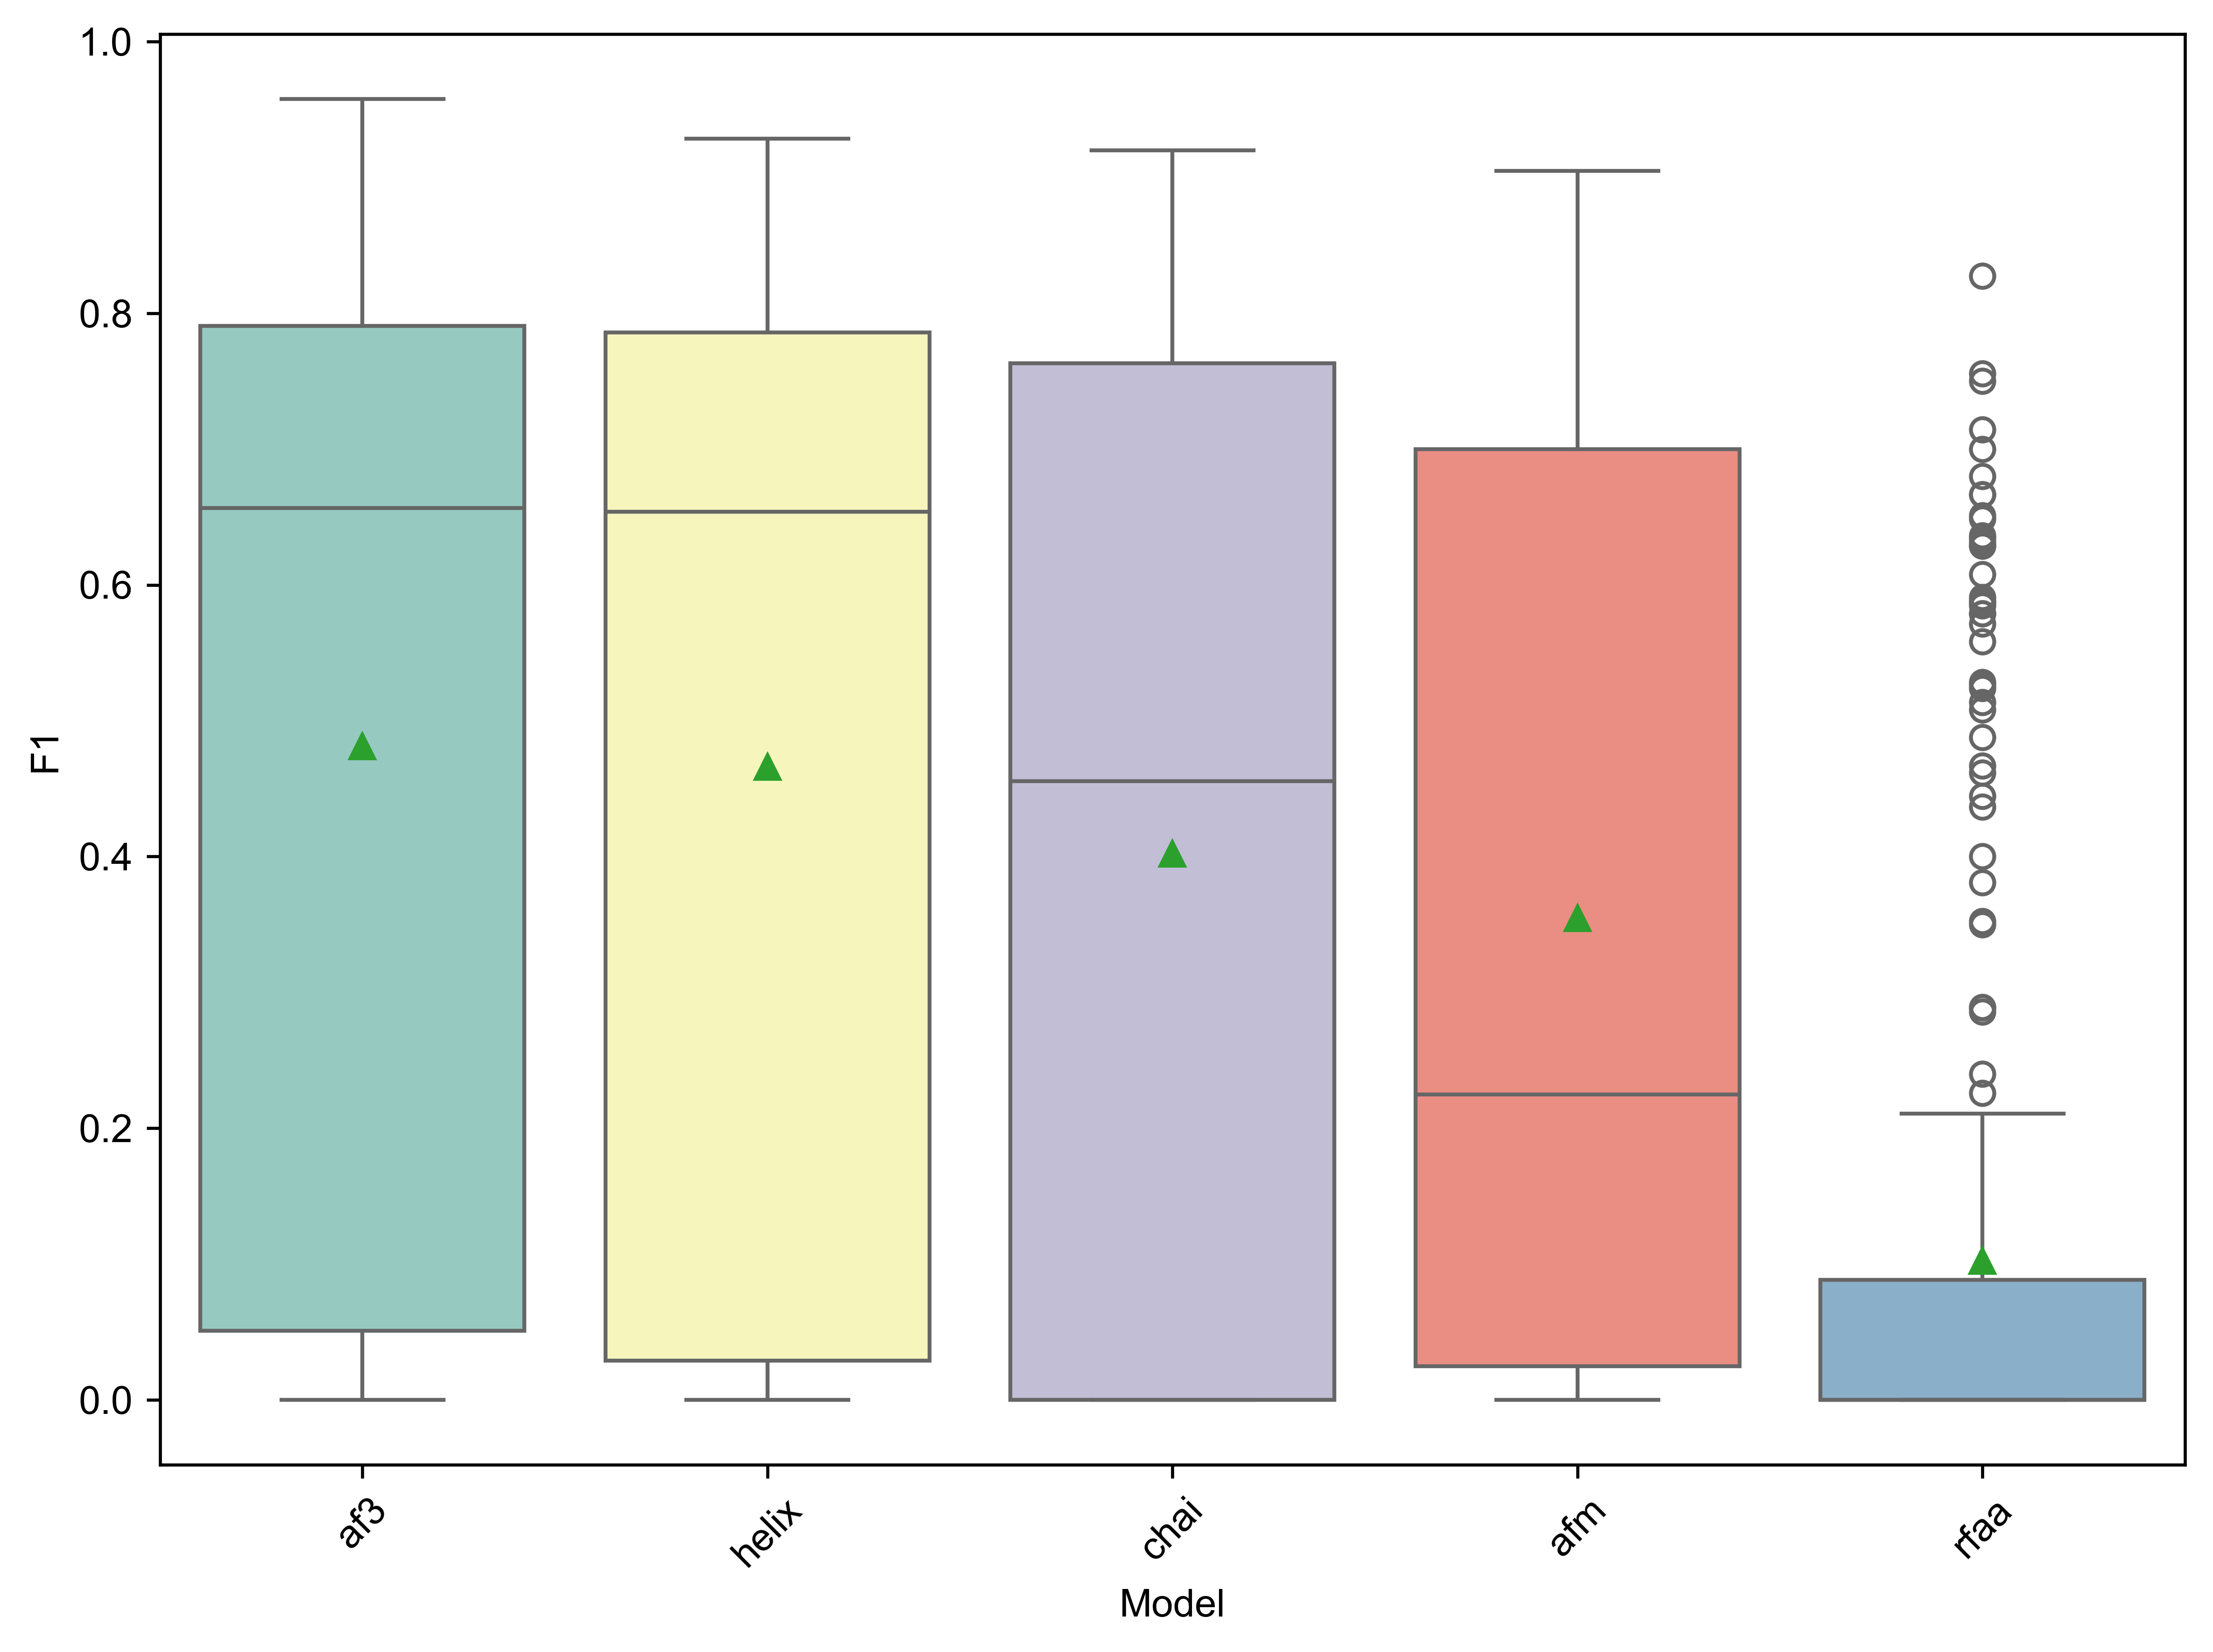

In [40]:
plot_dockq(df_dockq, "F1")

Model: af3, Mean iRMSD: 4.7401437446507915, Min iRMSD: 0.2411878761223893, Max iRMSD: 32.70472734710097, Median iRMSD: 1.7926757123130217
Model: afm, Mean iRMSD: 5.53187621631478, Min iRMSD: 0.2333791450816173, Max iRMSD: 40.20219399177951, Median iRMSD: 3.3412787400973007
Model: chai, Mean iRMSD: 6.158725129053903, Min iRMSD: 0.2599479292659781, Max iRMSD: 40.57525886860692, Median iRMSD: 2.6572718056082776
Model: helix, Mean iRMSD: 5.405530741209453, Min iRMSD: 0.2012076784707125, Max iRMSD: 51.28327457015352, Median iRMSD: 2.065058014461607
Model: rfaa, Mean iRMSD: 11.608131212767379, Min iRMSD: 0.6003393974944004, Max iRMSD: 40.950782304008456, Median iRMSD: 10.05824003221105


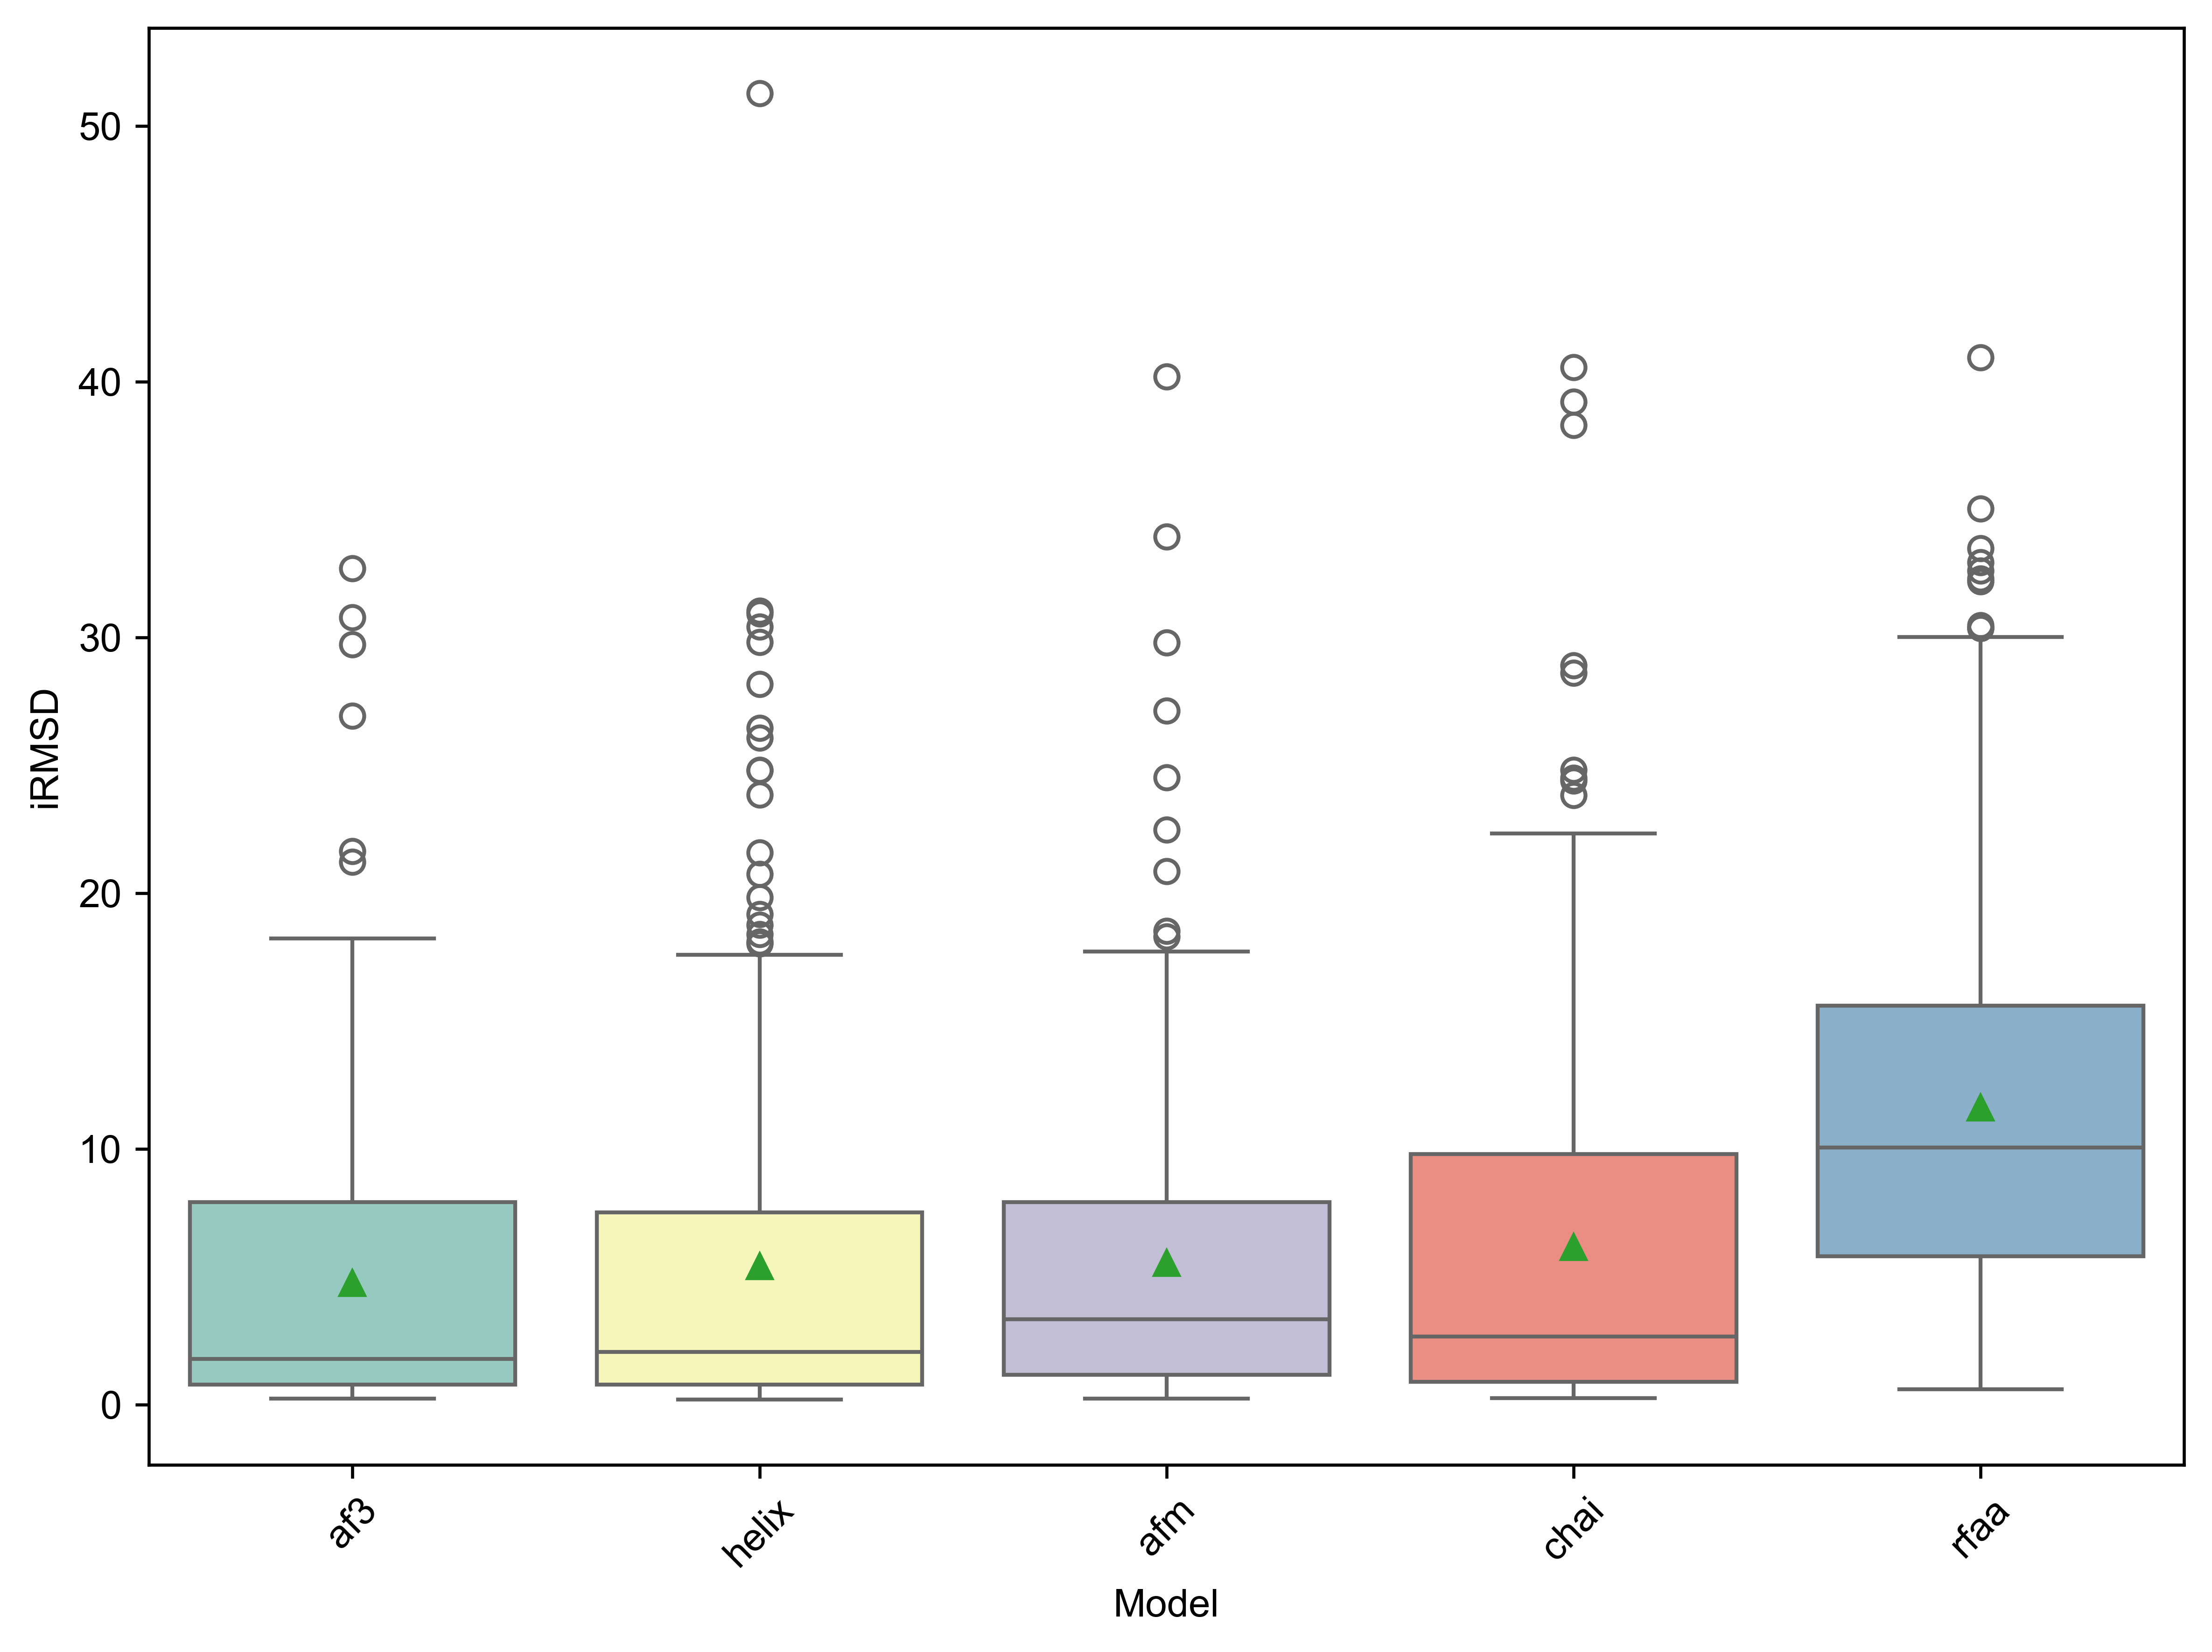

In [41]:
plot_dockq(df_dockq, "iRMSD")

Model: af3, Mean LRMSD: 10.396317970148308, Min LRMSD: 0.5519654541568919, Max LRMSD: 77.84209294280197, Median LRMSD: 3.681371774607271
Model: afm, Mean LRMSD: 11.83326796115243, Min LRMSD: 0.5294356623609837, Max LRMSD: 100.8822867613509, Median LRMSD: 6.952281315225999
Model: chai, Mean LRMSD: 13.4447223694364, Min LRMSD: 0.7062566458690409, Max LRMSD: 98.43018418995248, Median LRMSD: 6.563707593076723
Model: helix, Mean LRMSD: 11.674233311013966, Min LRMSD: 0.5448981317522593, Max LRMSD: 75.74016588752998, Median LRMSD: 4.544775829312021
Model: rfaa, Mean LRMSD: 26.431655904964114, Min LRMSD: 1.0211115347725652, Max LRMSD: 94.3385282654762, Median LRMSD: 22.92798519021705


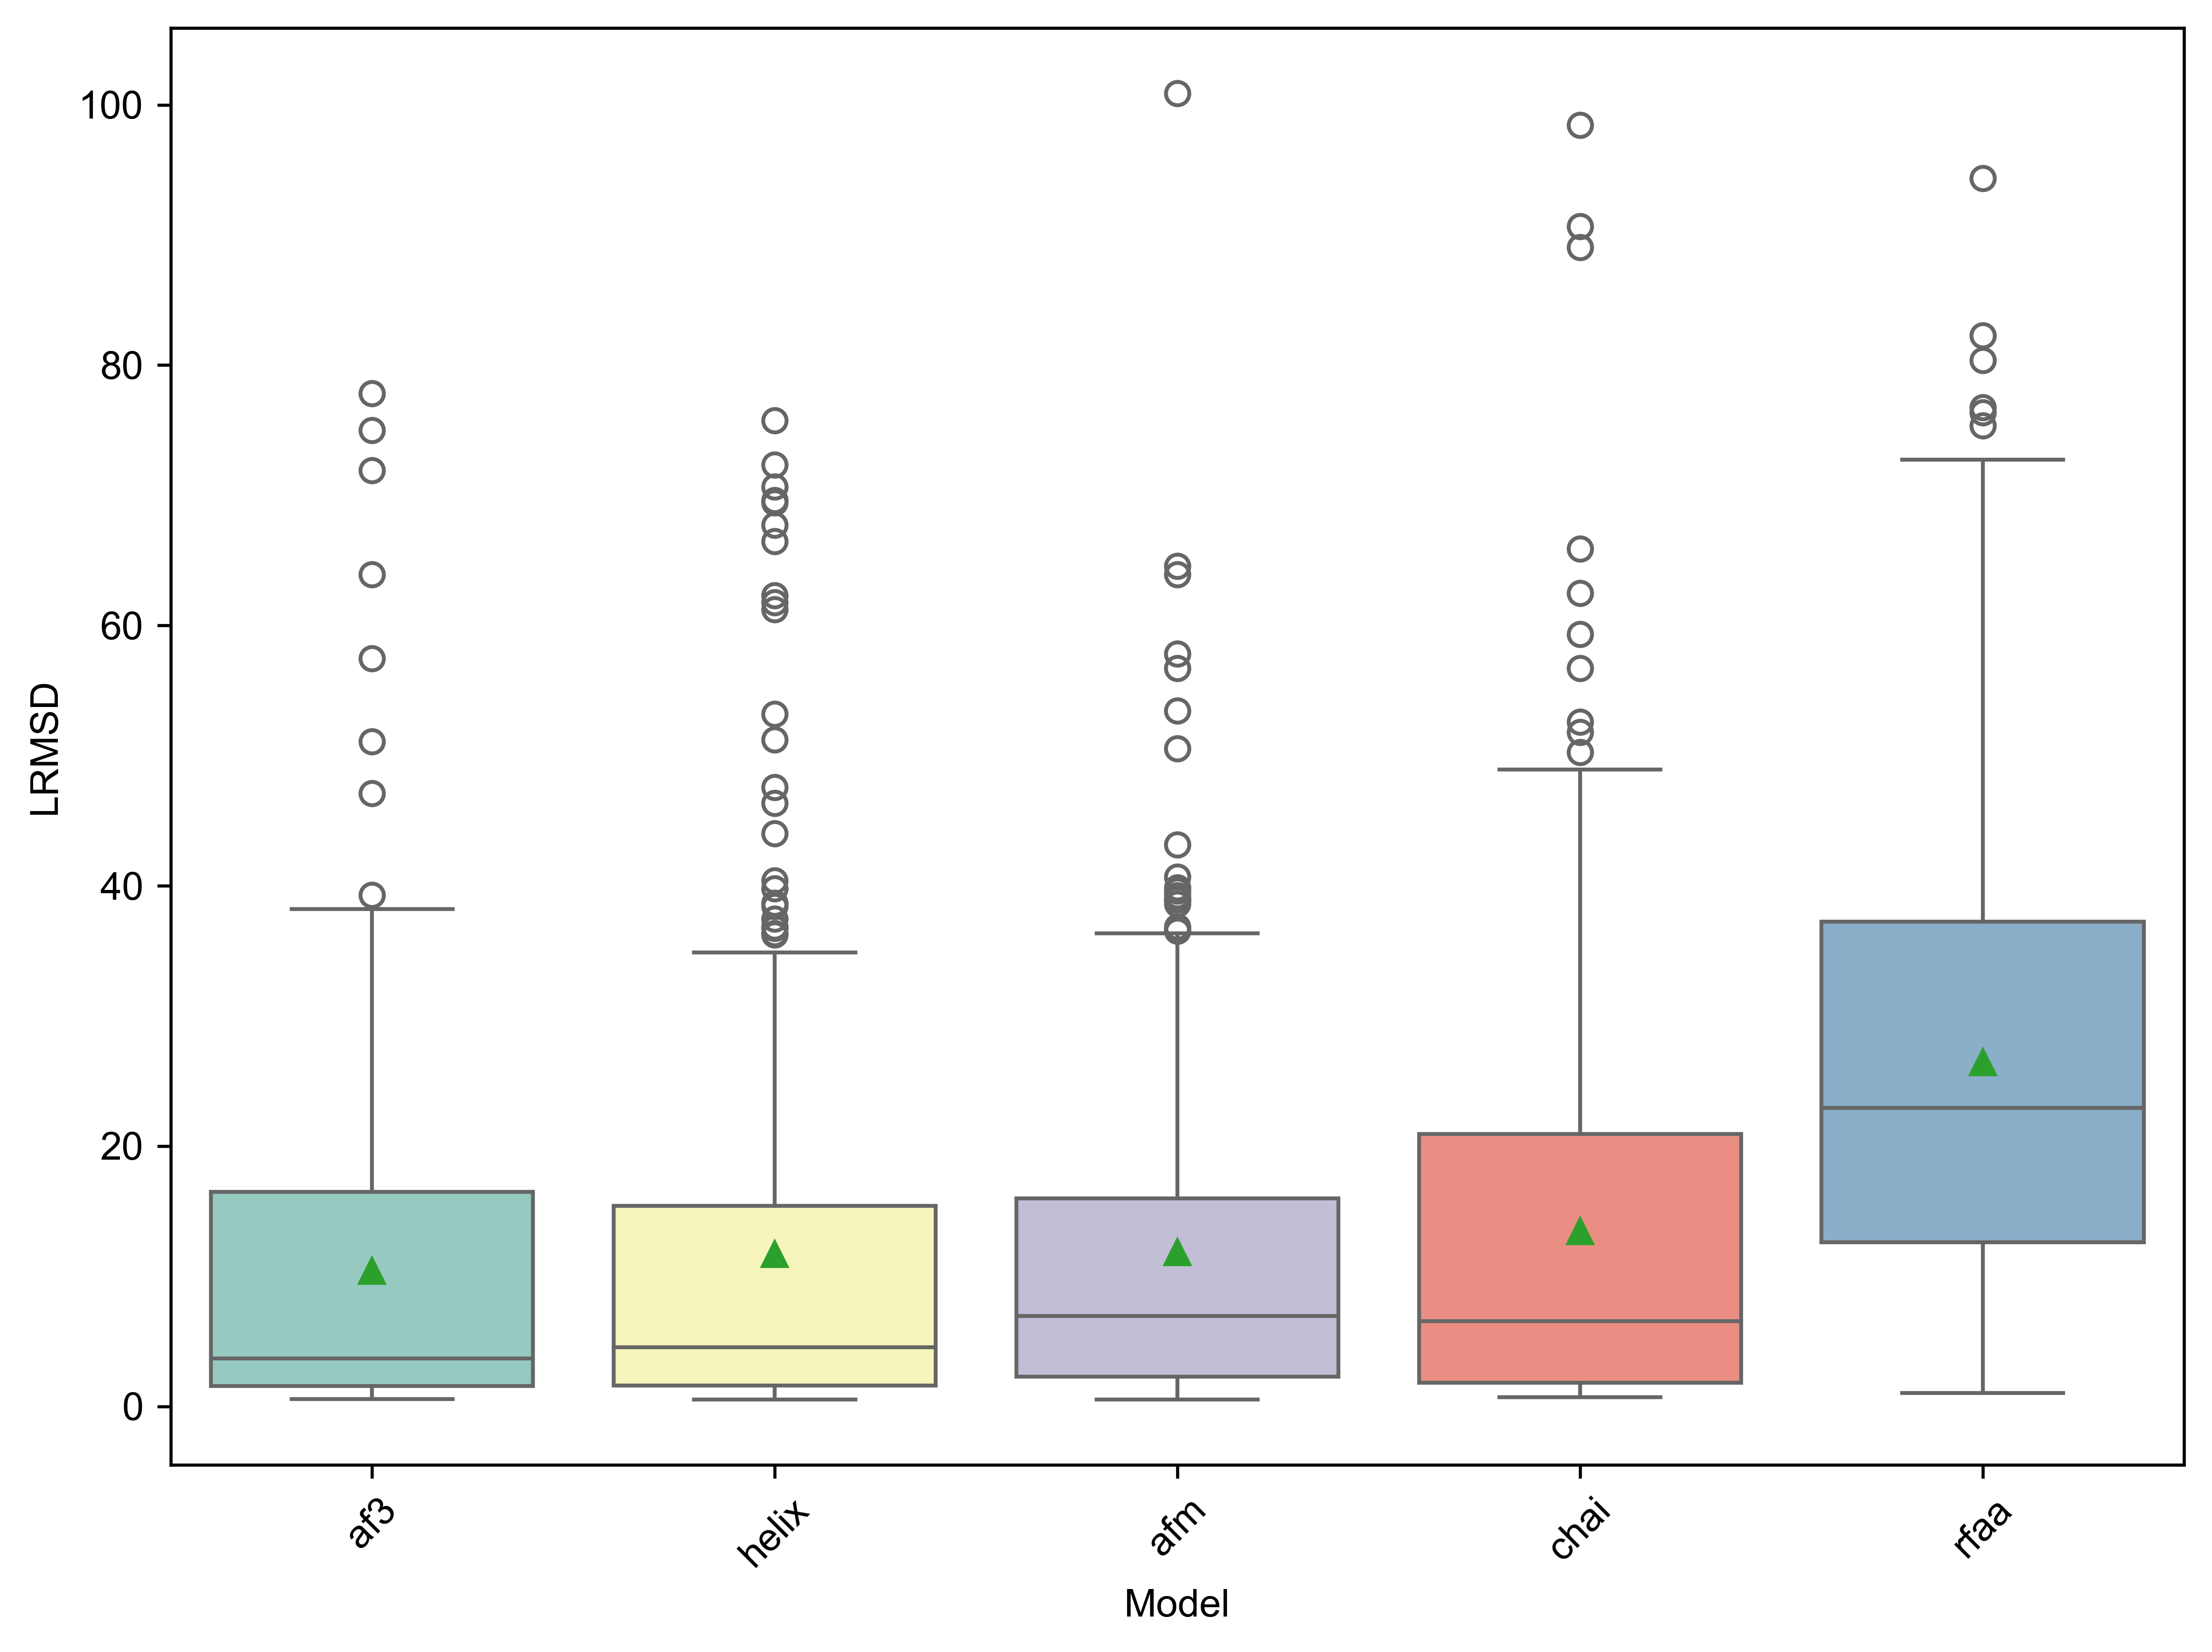

In [42]:
plot_dockq(df_dockq, "LRMSD")

Model: af3, Mean fnat: 0.47626423537324614, Min fnat: 0.0, Max fnat: 0.9705882352941176, Median fnat: 0.645
Model: afm, Mean fnat: 0.3444071106407229, Min fnat: 0.0, Max fnat: 0.8809523809523809, Median fnat: 0.2029411764705882
Model: chai, Mean fnat: 0.3954624408189604, Min fnat: 0.0, Max fnat: 0.96, Median fnat: 0.46265243902439024
Model: helix, Mean fnat: 0.45933416216458167, Min fnat: 0.0, Max fnat: 0.9565217391304348, Median fnat: 0.6381818181818182
Model: rfaa, Mean fnat: 0.09009556003218845, Min fnat: 0.0, Max fnat: 0.7857142857142857, Median fnat: 0.0


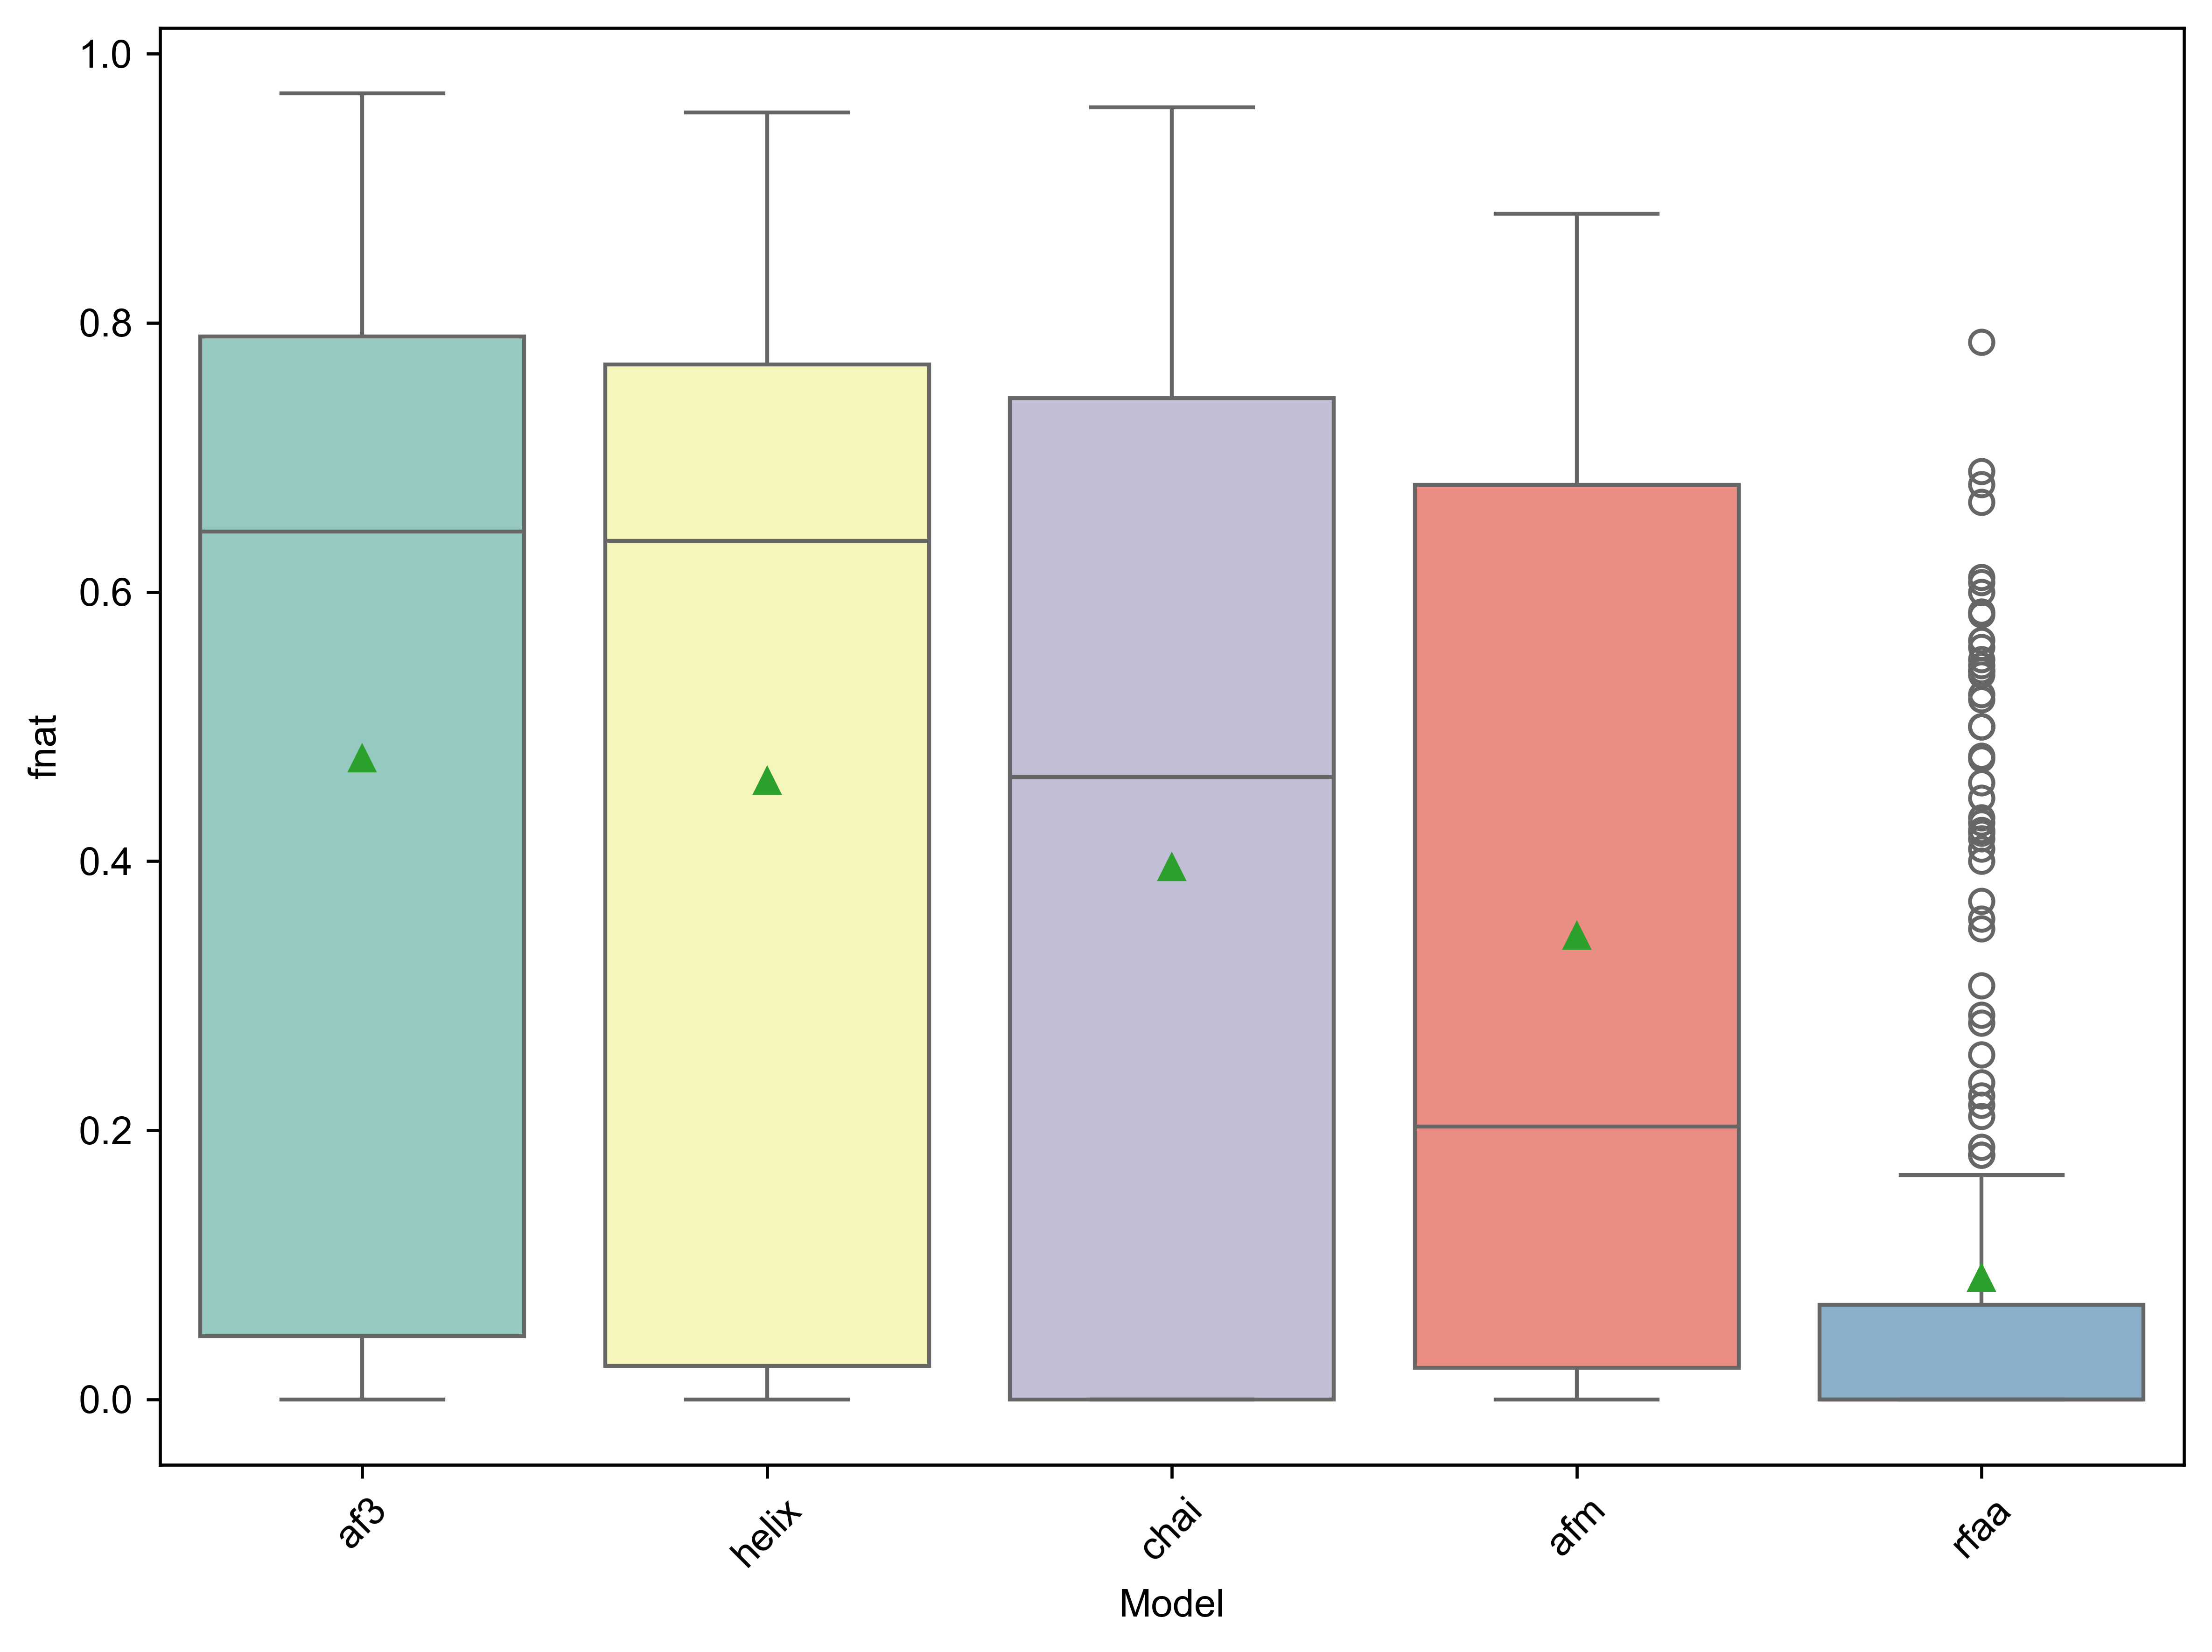

In [43]:
plot_dockq(df_dockq, "fnat")

In [44]:
# for metric in ["DockQ", "F1", "iRMSD", "LRMSD", "fnat"]:
#     plot_dockq(df_dockq, metric, seed_mode=True)

# for metric in ["DockQ", "F1", "iRMSD", "LRMSD", "fnat"]:
#     plot_dockq(df_dockq_core, metric, seed_mode=True)